In [2]:
# ==========================================
# 1. Install and Load Required Libraries
# ==========================================

ensure_loaded <- function(pkg) {
  if (!require(pkg, character.only = TRUE)) {
    install.packages(pkg)
    library(pkg, character.only = TRUE)
  }
}

ensure_loaded("tidyverse")
ensure_loaded("matlib")
ensure_loaded("rsample")

# ==========================================
# 2. Data Loading and Processing
# ==========================================

data_url <- "https://raw.githubusercontent.com/Rbimochan/Modeling-blood-glucose-/main/R-code/blood_glucose.csv"

# Load data into 'da'
da <- readr::read_csv(data_url)

# Rename the 7th column to "bg1" inside 'da'
da <- da %>%
  dplyr::rename(bg1 = names(.)[7])

# ==========================================
# 3. Initial Check
# ==========================================

print("Column names after renaming:")
print(names(da))

print(head(da))

Rows: 21919 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (7): bg_mean, insulin_sum, carbs_sum, hr_mean, steps_sum, cals_sum, bg+1:00

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Column names after renaming:"
[1] "bg_mean"     "insulin_sum" "carbs_sum"   "hr_mean"     "steps_sum"  
[6] "cals_sum"    "bg1"        
# A tibble: 6 × 7
  bg_mean insulin_sum carbs_sum hr_mean steps_sum cals_sum   bg1
    <dbl>       <dbl>     <dbl>   <dbl>     <dbl>    <dbl> <dbl>
1    13.3        1.86         0      NA         0        0  13.4
2    13.5        1.96         0      NA         0        0  12.8
3    13.7        2.06         0      NA         0        0  15.5
4    13.9        2.17         0      NA         0        0  14.8
5    14.1        2.27         0      NA         0        0  12.7
6    14.3        2.37         0      NA         0        0  11.4


In [3]:
# --- Data Standardization ---

# Rename columns to standard format: Features (X1-X6) and Target (y)
colnames(da) <- c("X1", "X2", "X3", "X4", "X5", "X6", "y")

# --- Data Inspection ---

# Verify renaming and check structure
head(da)
dim(da)

# --- Statistical Summary ---
# Overview of variable distributions
summary(da)
# Checking for null values across all columns
colSums(is.na(da))

X1,X2,X3,X4,X5,X6,y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13.34167,1.8644,0,NA,0,0,13.4
13.54167,1.9646,0,NA,0,0,12.8
13.71667,2.0648,0,NA,0,0,15.5
13.90833,2.1650,0,NA,0,0,14.8
14.10417,2.2652,0,NA,0,0,12.7
14.28750,2.3654,0,NA,0,0,11.4


[1] 21919     7

       X1               X2                X3               X4        
 Min.   : 2.804   Min.   : 0.6819   Min.   :  0.00   Min.   : 52.00  
 1st Qu.: 7.506   1st Qu.: 6.1425   1st Qu.:  0.00   1st Qu.: 72.44  
 Median : 8.836   Median :10.9345   Median : 30.00   Median : 81.84  
 Mean   : 9.096   Mean   :11.3989   Mean   : 36.04   Mean   : 81.17  
 3rd Qu.:10.281   3rd Qu.:15.3329   3rd Qu.: 60.00   3rd Qu.: 88.65  
 Max.   :20.338   Max.   :51.7439   Max.   :750.00   Max.   :143.00  
                                                     NA's   :7872    
       X5              X6               y         
 Min.   :    0   Min.   :   0.0   Min.   : 2.200  
 1st Qu.:    0   1st Qu.:   0.0   1st Qu.: 6.700  
 Median :  600   Median : 167.3   Median : 8.600  
 Mean   : 2230   Mean   : 295.9   Mean   : 9.101  
 3rd Qu.: 3892   3rd Qu.: 524.6   3rd Qu.:11.000  
 Max.   :19054   Max.   :1449.3   Max.   :27.800  
                                                  

X1   X2   X3   X4   X5   X6    y 
   0    0    0 7872    0    0    0

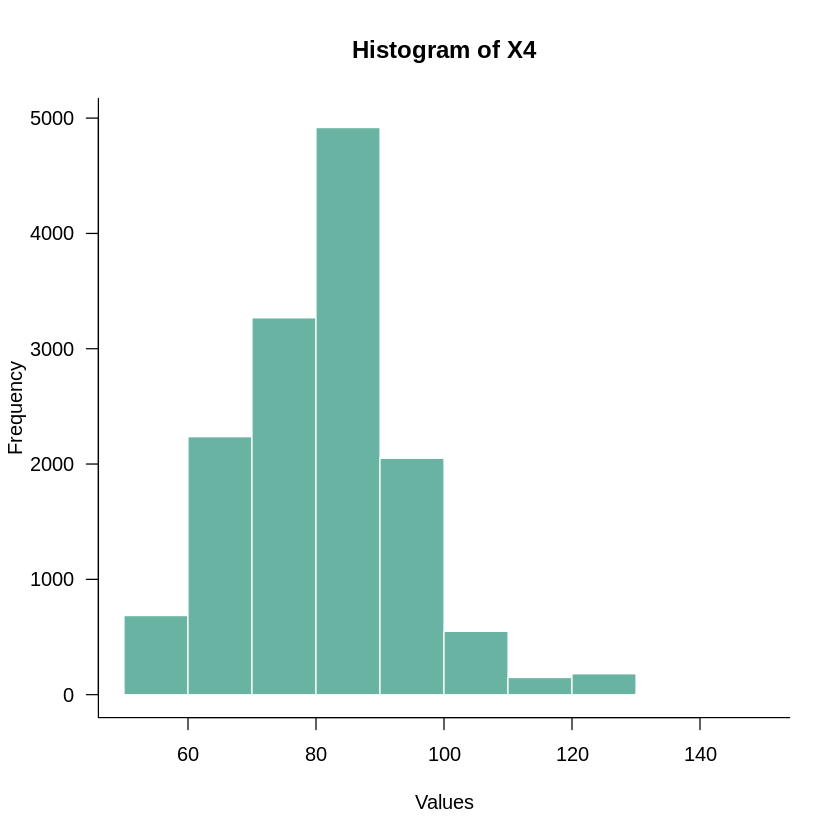

In [6]:
# --- Histogram Visualization for X4 ---

# Calculate dynamic y-axis limit with 10% headroom for better label visibility
counts <- table(cut(da$X4, breaks = 10))
y_limit <- c(0, max(counts) * 1.1)

# Create the histogram with enhanced styling
hist(da$X4,
     main = "Histogram of X4",
     xlab = "Values",
     ylab = "Frequency",
     col = "#69b3a2",      # Modern teal color
     border = "white",     # Cleaner white borders
     breaks = 10,
     ylim = y_limit,       # Apply dynamic y-limits
     las = 1               # Horizontal y-axis labels
)

# Cosmetic: Add an L-shaped box around the plot area
box(bty = "l")

In [7]:
# --- Missing Value Imputation for X4 ---

# 1. Calculate and store descriptive statistics
# We store the median to avoid recalculating it during imputation
median_x4 <- median(da$X4, na.rm = TRUE)
mean_x4   <- mean(da$X4, na.rm = TRUE)

# Display statistics for verification
print(paste("Median:", median_x4))
print(paste("Mean:", mean_x4))

# 2. Impute missing values
# Replace all NA entries in X4 with the calculated median
da$X4[is.na(da$X4)] <- median_x4

# 3. Verify Data Integrity
# Preview the first few rows to ensure data structure is maintained
head(da, 3)

[1] "Median: 81.8416666666667"
[1] "Mean: 81.1745022291741"


X1,X2,X3,X4,X5,X6,y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13.34167,1.8644,0,81.84167,0,0,13.4
13.54167,1.9646,0,81.84167,0,0,12.8
13.71667,2.0648,0,81.84167,0,0,15.5



=== TASK 1: Exploratory Data Analysis ===
Creating time series plots...


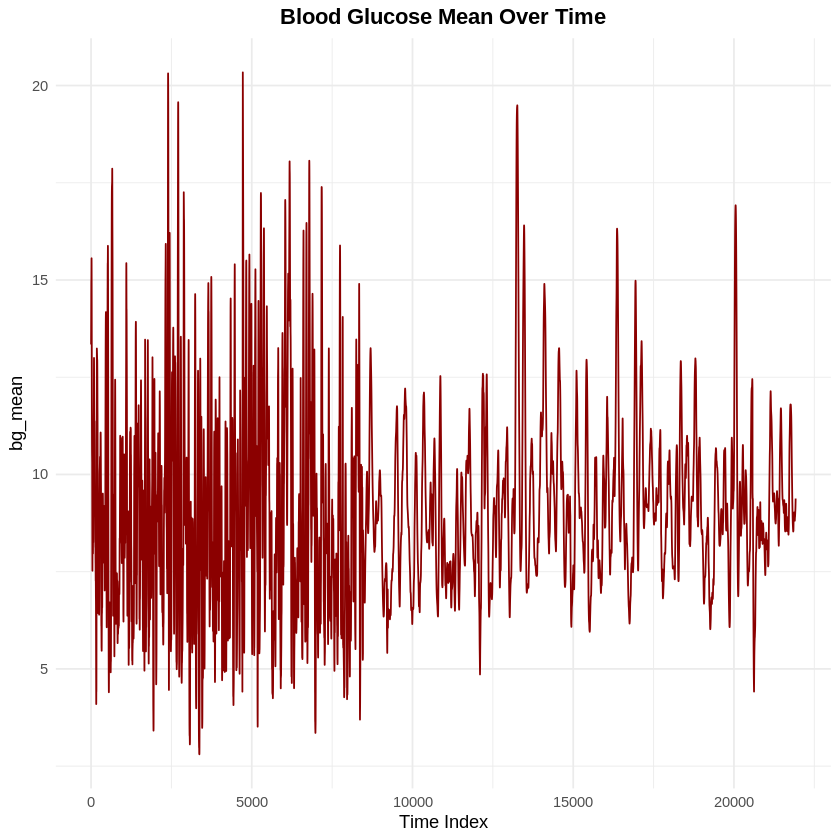

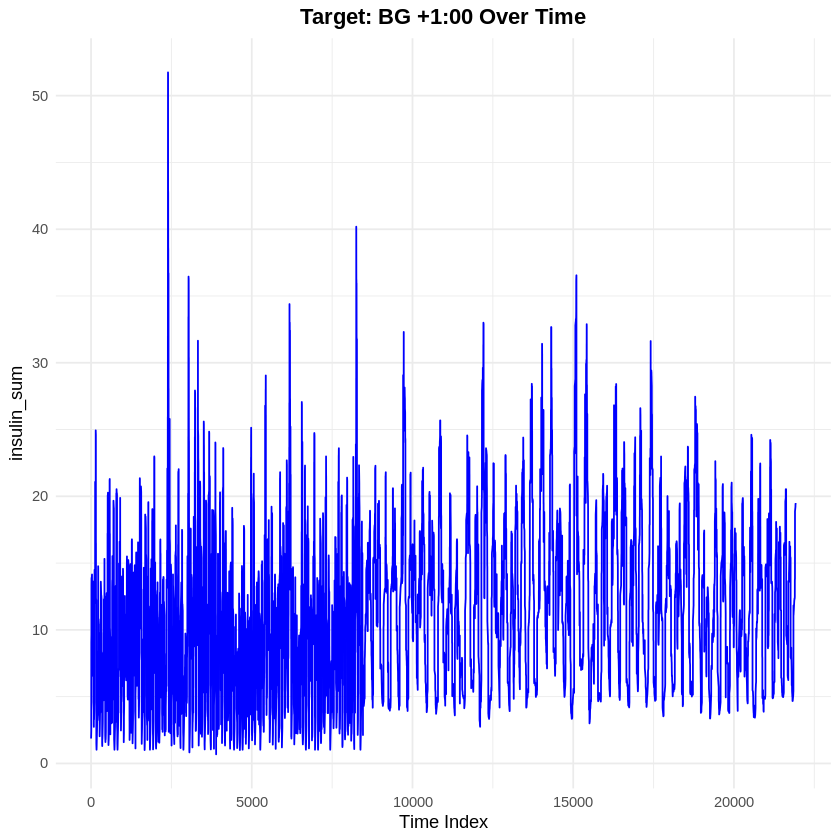

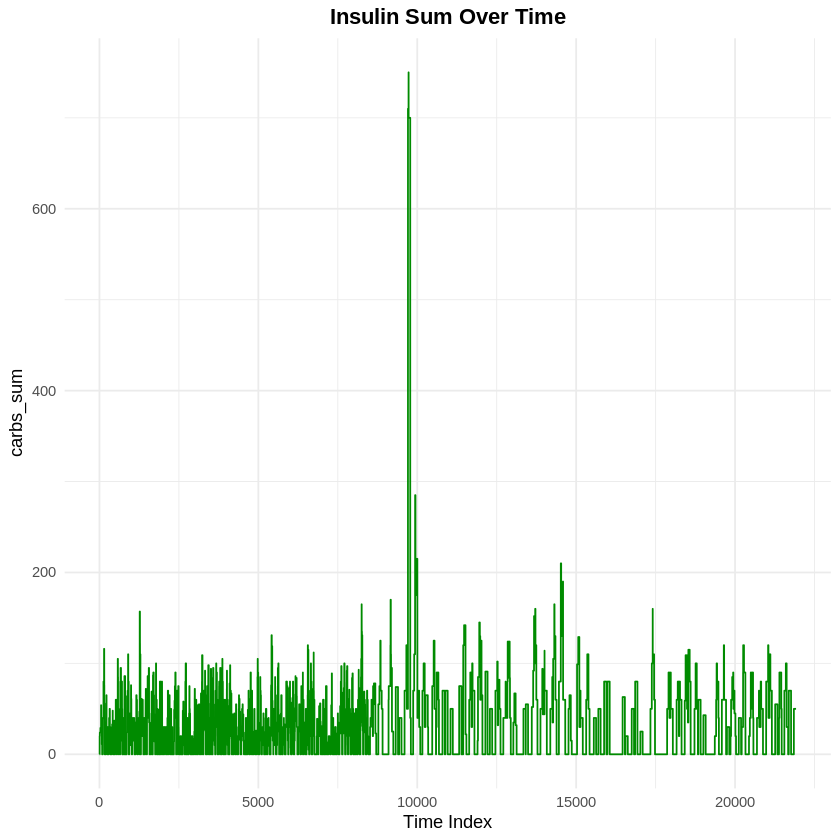

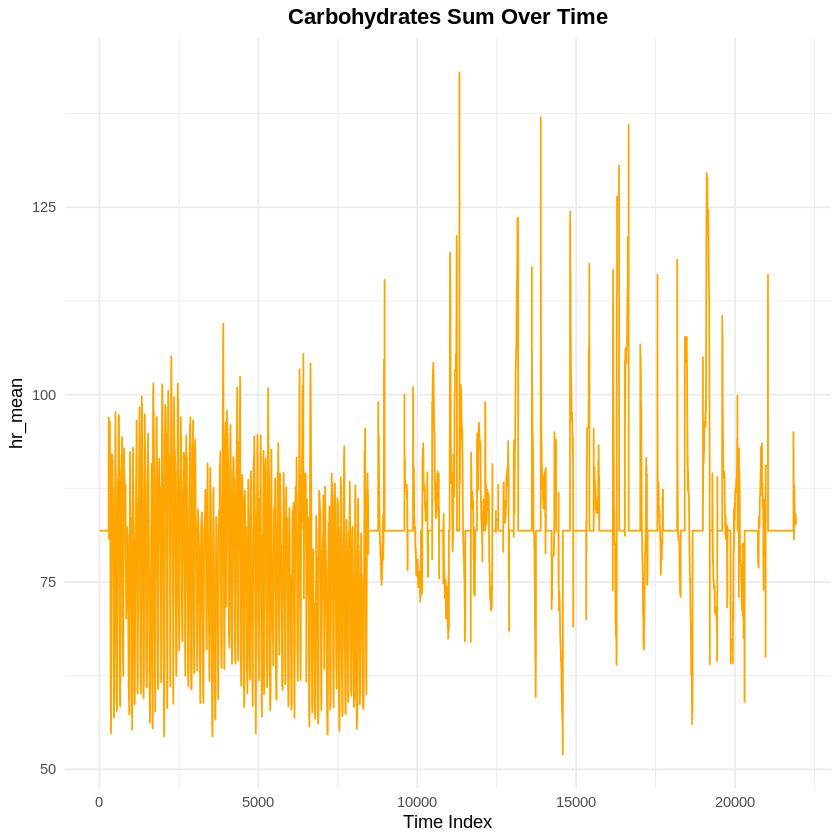

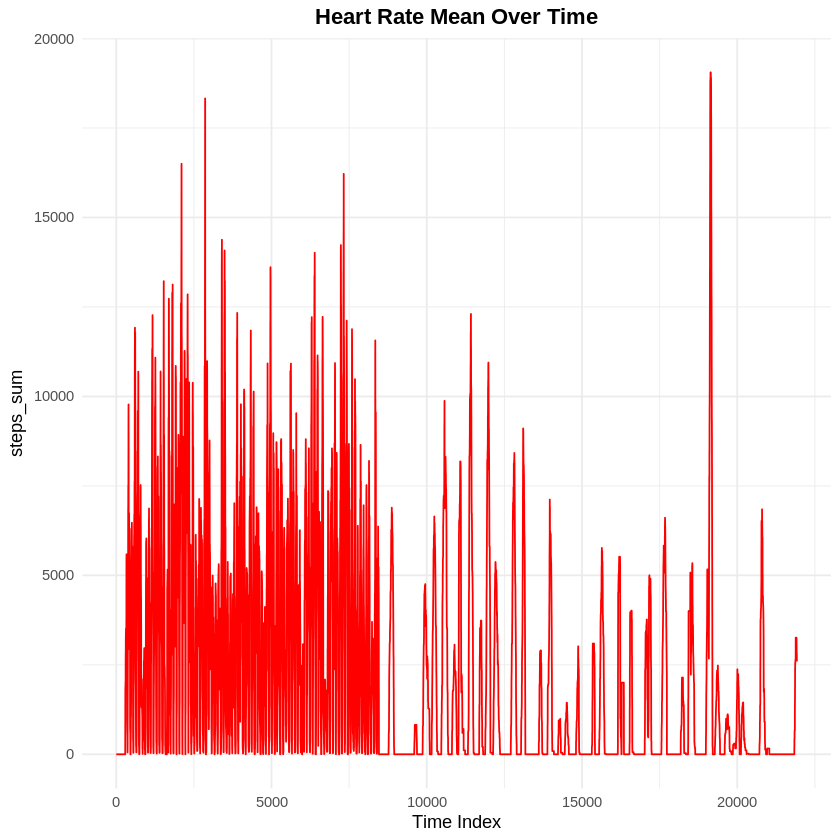

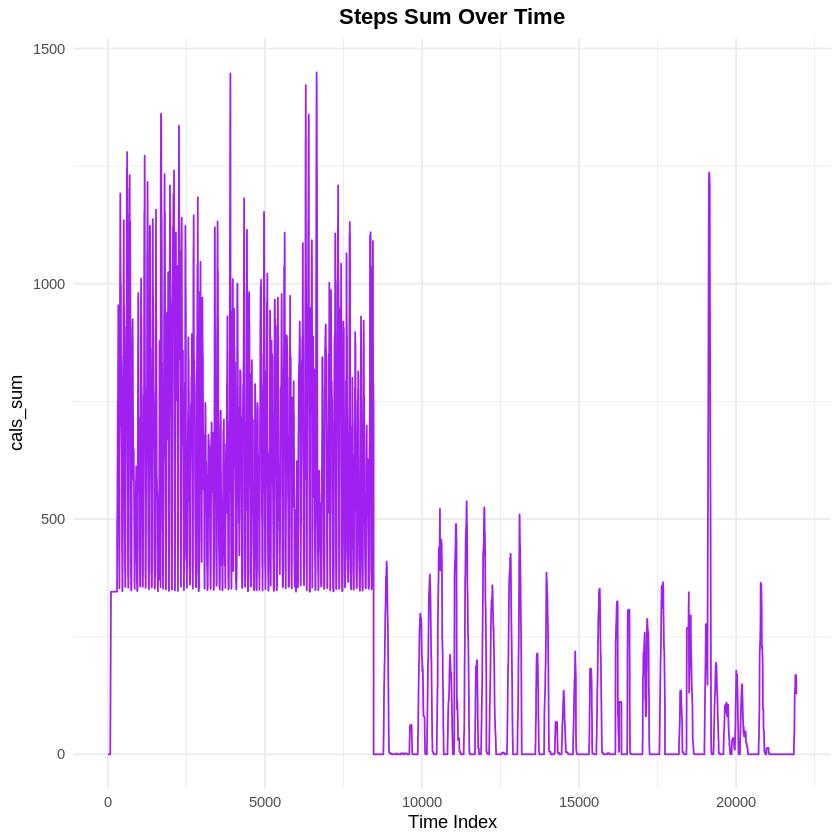

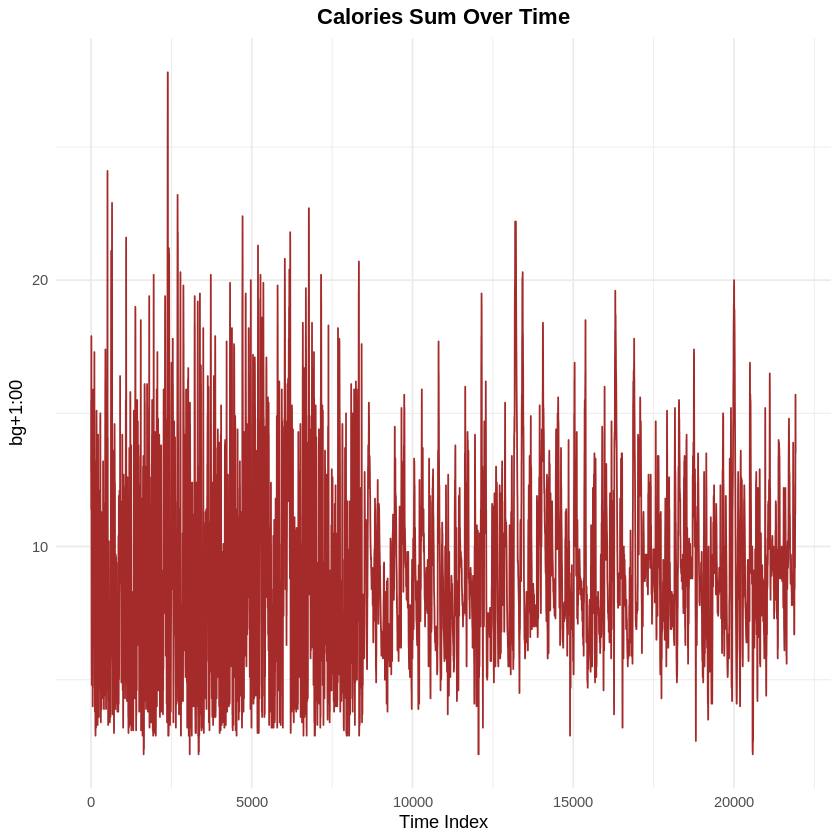

In [8]:
# ==============================================================================
# TASK 1: EXPLORATORY DATA ANALYSIS
# ==============================================================================

cat("\n=== TASK 1: Exploratory Data Analysis ===\n")

# Add time index for plotting
da$time_index <- 1:nrow(da)

# --- 1. TIME SERIES PLOTS ---
cat("Creating time series plots...\n")

# Define a helper function to avoid code repetition
plot_ts <- function(y_vals, color, title, y_lab) {
  ggplot(da, aes(x = time_index, y = y_vals)) +
    geom_line(color = color, linewidth = 0.5) +
    labs(title = title, x = "Time Index", y = y_lab) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold"))
}

# Create individual plots using the helper function
X1 <- plot_ts(da$X1, "darkred", "Blood Glucose Mean Over Time",   "bg_mean")
X2 <- plot_ts(da$X2, "blue",    "Target: BG +1:00 Over Time",     "insulin_sum")
X3 <- plot_ts(da$X3, "green4",  "Insulin Sum Over Time",          "carbs_sum")
X4 <- plot_ts(da$X4, "orange",  "Carbohydrates Sum Over Time",    "hr_mean")
X5 <- plot_ts(da$X5, "red",     "Heart Rate Mean Over Time",      "steps_sum")
X6 <- plot_ts(da$X6, "purple",  "Steps Sum Over Time",            "cals_sum")
y  <- plot_ts(da$y,  "brown",   "Calories Sum Over Time",         "bg+1:00")

# Display the plots
print(X1)
print(X2)
print(X3)
print(X4)
print(X5)
print(X6)
print(y)

In [9]:
# --- Export Plots to PNG ---

# Set up the graphics device to save to a high-resolution PNG file
png(filename = "histograms_X1_to_X6.png", 
    width = 1600, 
    height = 1200, 
    res = 200) # Resolution in ppi

# [INSERT PLOTTING COMMANDS HERE]
# Any plots generated between png() and dev.off() will be saved to the file.
# Example: 
# par(mfrow = c(2, 3)) # Set up a 2x3 grid
# hist(da$X1); hist(da$X2); ...

# Close the graphics device to complete saving the file
dev.off()

agg_record_1918991386 
                    2

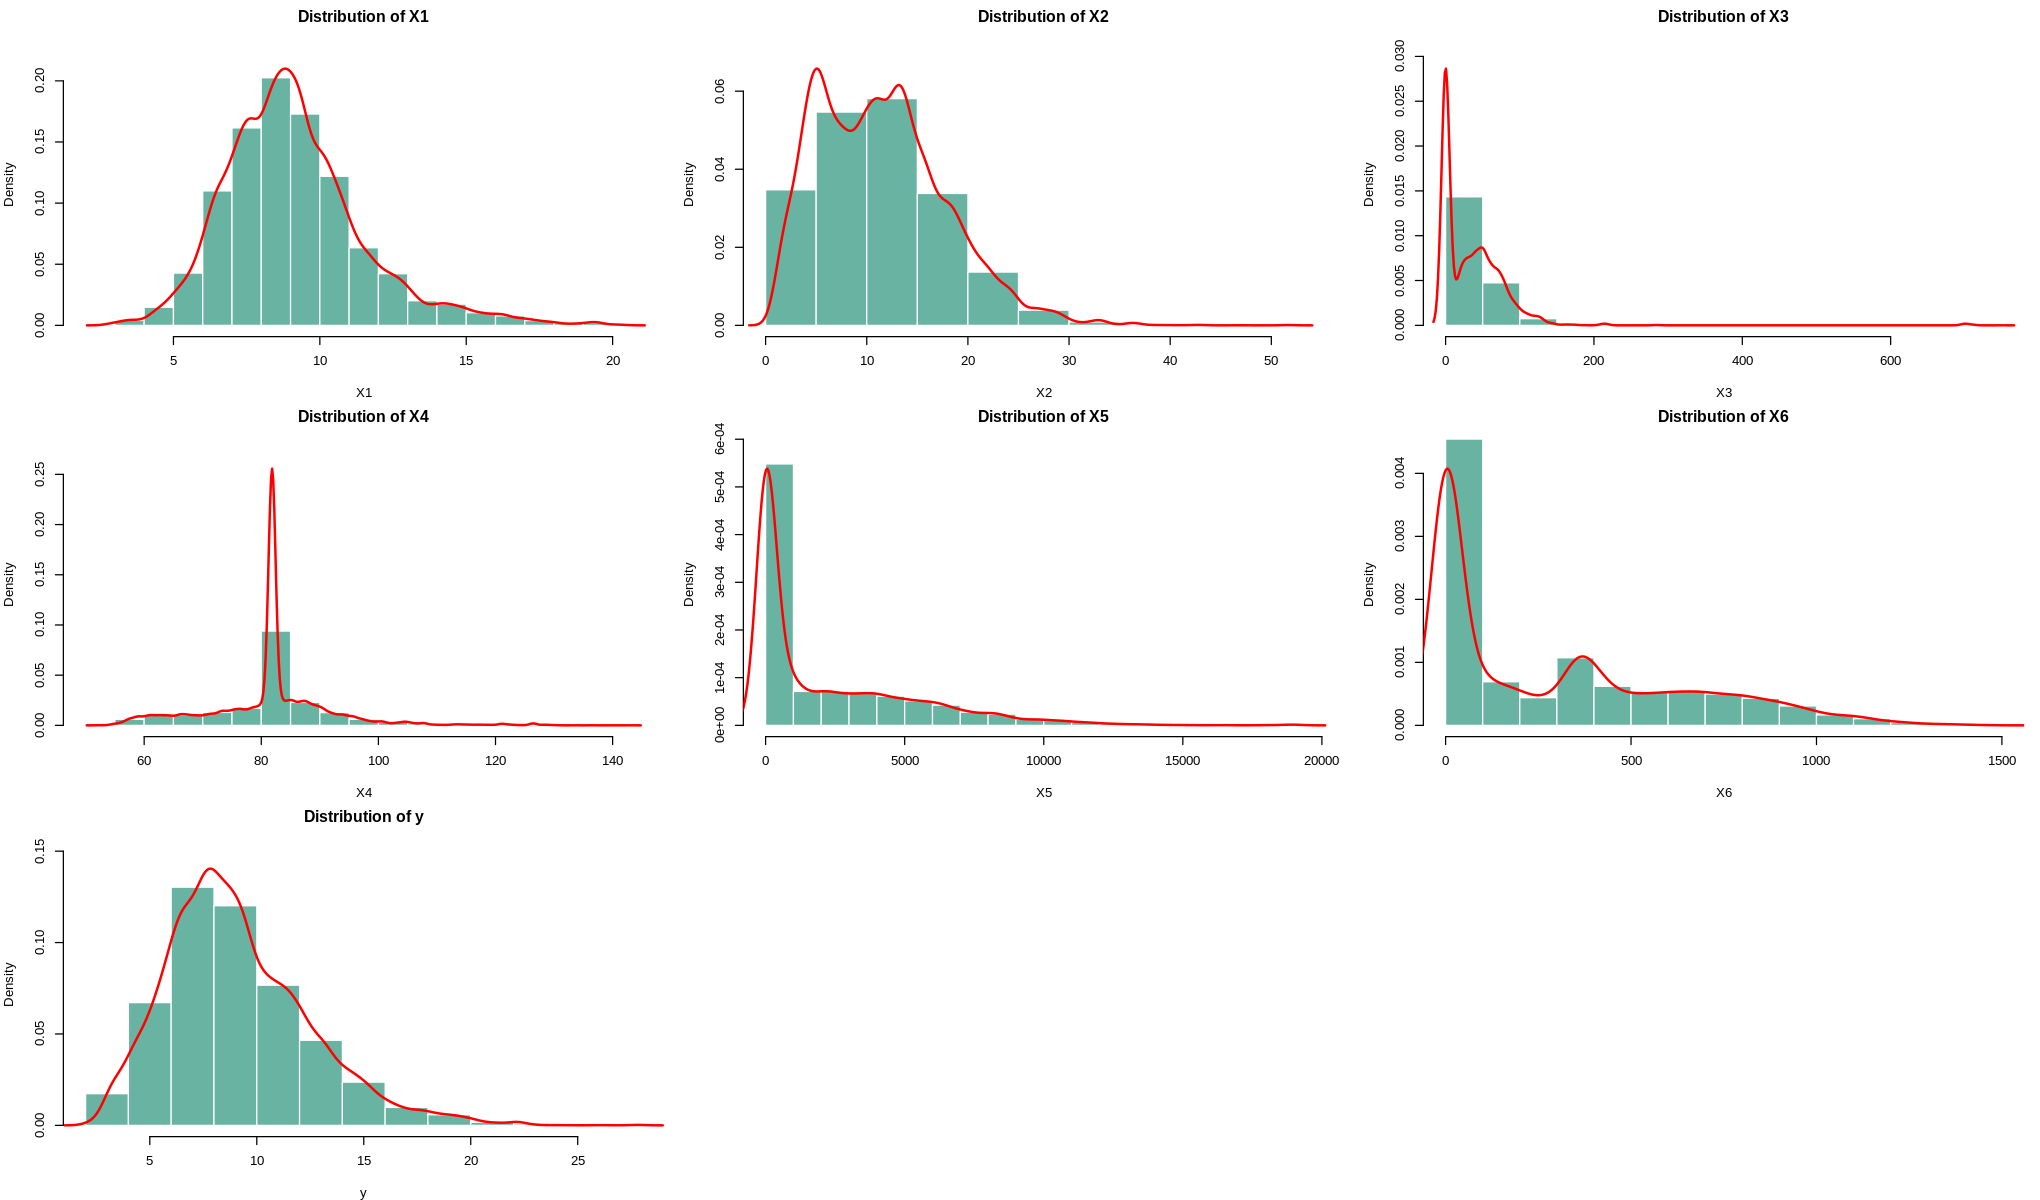

In [10]:
# --- Distribution Analysis: Histograms with Density Curves ---

# Set plot size for better visibility in Jupyter/VS Code
options(repr.plot.width = 17, repr.plot.height = 10)

# 1. Data Preparation
# Create a working copy of the dataframe
plot_df <- da

# Ensure columns are named X1-X6, y for the loop
# This block handles cases where the dataframe uses descriptive names
name_map <- c("bg_mean" = "X1", "insulin_sum" = "X2", "carbs_sum" = "X3",
              "hr_mean" = "X4", "steps_sum" = "X5", "cals_sum" = "X6",
              "bg_plus_1" = "y")

for (orig in names(name_map)) {
  if (orig %in% names(plot_df)) {
    names(plot_df)[names(plot_df) == orig] <- name_map[orig]
  }
}

# 2. Grid Setup
# Configure a 3x3 layout with custom margins
par(mfrow = c(3, 3), mar = c(4, 4, 2, 1))

# 3. Plot Generation Loop
vars_to_plot <- c("X1", "X2", "X3", "X4", "X5", "X6", "y")

for (col in vars_to_plot) {
  # Skip if column doesn't exist (safety check)
  if (col %in% names(plot_df)) {
    vals <- plot_df[[col]]
    
    # Calculate density for the overlay line
    d <- density(vals, na.rm = TRUE)
    
    # Create histogram
    hist(vals,
         main = paste("Distribution of", col),
         xlab = col,
         ylab = "Density",
         col = "#69b3a2",
         border = "white",
         probability = TRUE,
         ylim = c(0, max(d$y) * 1.1)) # Add 10% headroom for the curve
    
    # Overlay density curve
    lines(d, col = "red", lwd = 2)
  }
}

# Reset layout to default
par(mfrow = c(1, 1))

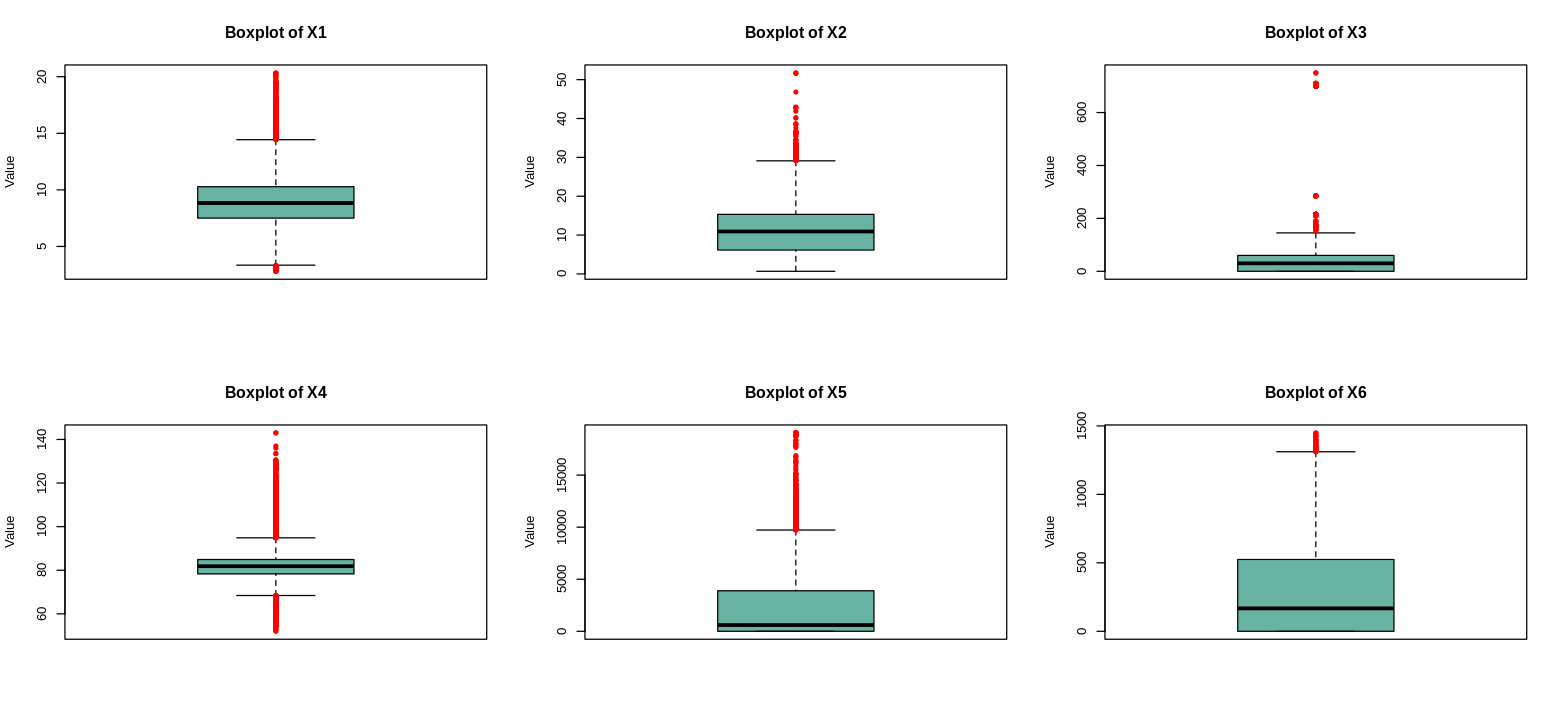

In [11]:
# --- Outlier Analysis: Boxplots ---

# 1. Setup Plot Dimensions
# Adjust the plot size to comfortably fit a 2x3 grid
options(repr.plot.width = 13, repr.plot.height = 6)

# 2. Configure Grid Layout
# Set parameters for 2 rows and 3 columns
par(mfrow = c(2, 3))

# 3. Generate Boxplots for Features X1-X6
feature_cols <- c("X1", "X2", "X3", "X4", "X5", "X6")

for (col in feature_cols) {
  # boxplot() automatically handles scaling
  boxplot(da[[col]],
          main = paste("Boxplot of", col), # Clearer title
          ylab = "Value",
          col = "#69b3a2",        # Uniform teal color
          outcol = "red",         # Highlight outliers in red
          outpch = 19)            # Use solid circles for outliers
}

# 4. Reset Graphics Parameters
# Always good practice to reset layout to default (1x1)
par(mfrow = c(1, 1))

In [ ]:
#correlation and scatter plots (between different combinations of input and output variables ) to 


=== TASK 1.4: Statistical Relationship Analysis ===


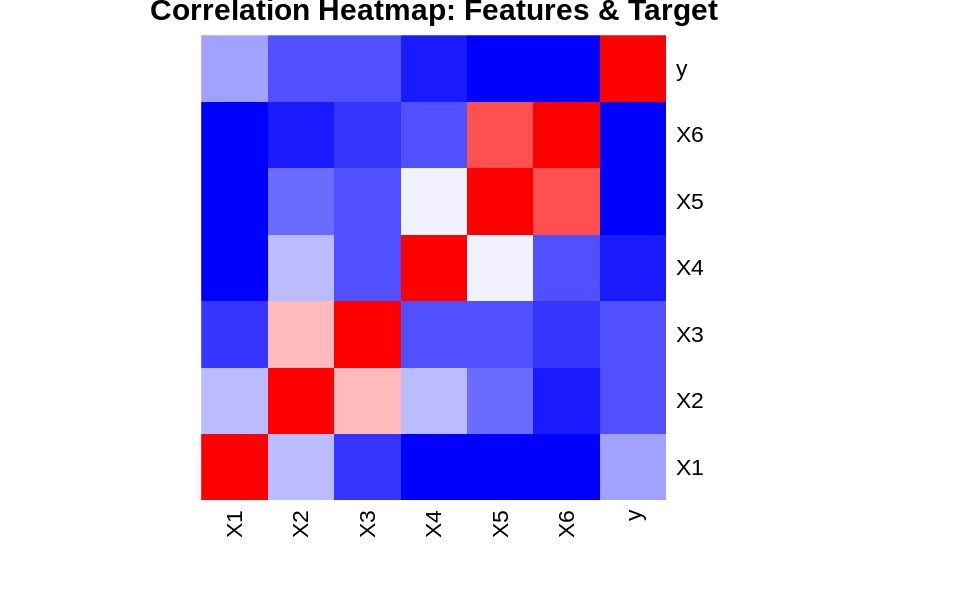

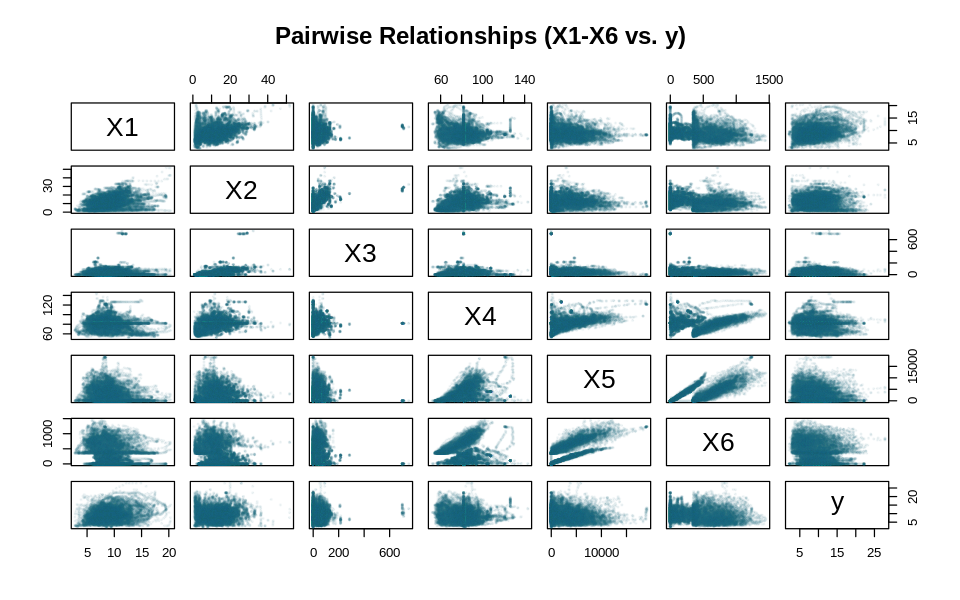


Correlation of each feature with Target (y):
         X1          X2          X3          X4          X5          X6 
 0.24927835  0.07166689  0.06003725 -0.04979208 -0.08838207 -0.07704239 
          y 
 1.00000000 


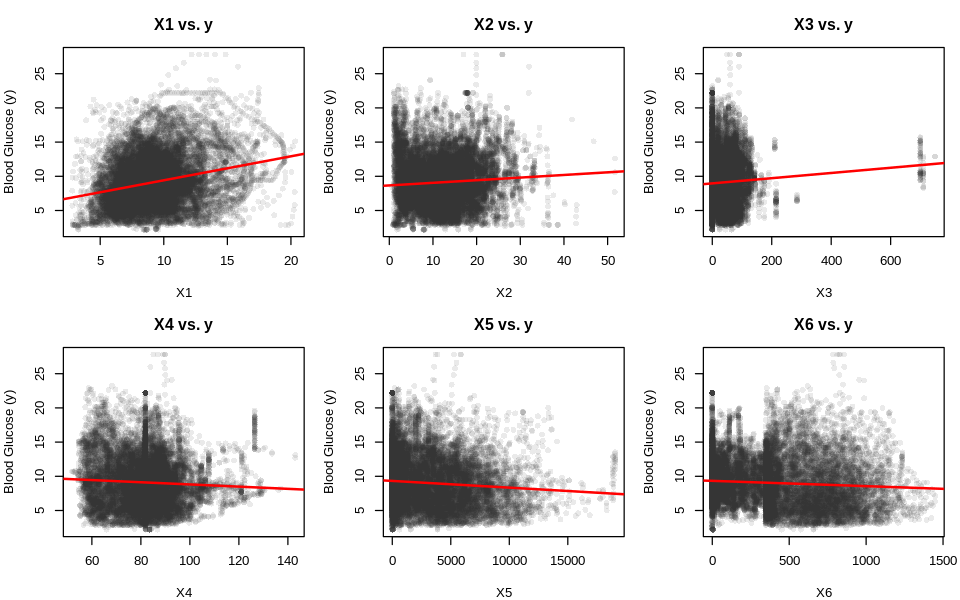

In [ ]:
# ==============================================================================
# TASK 1.4: CORRELATION AND SCATTER ANALYSIS (NO EXTRA LIBRARIES)
# ==============================================================================

cat("\n=== TASK 1.7: Statistical Relationship Analysis ===\n")

# 1. Compute Correlation Matrix
# Standardizing the variable set to include features and target
cor_data <- da[, c("X1", "X2", "X3", "X4", "X5", "X6", "y")]
cor_matrix <- cor(cor_data, use = "complete.obs")

# 2. Visual Heatmap using Base R (Heatmap)
# Providing a color-coded view of feature relationships
palette <- colorRampPalette(c("blue", "white", "red"))(20)
heatmap(cor_matrix, 
        Rowv = NA, Colv = NA, 
        col = palette, 
        scale = "none", 
        margins = c(5,5),
        main = "Correlation Heatmap: Features & Target")

# 3. High-Density Pairwise Scatter Plots
# Managing n=21,919 points with transparency (alpha) to see data density

pairs(cor_data, 
      col = rgb(0.1, 0.4, 0.5, 0.05), # Low alpha to handle overplotting
      pch = 20, 
      cex = 0.5,
      main = "Pairwise Relationships (X1-X6 vs. y)")

# 4. Target-Specific Relationship Plots (X vs y)
# Adding a linear regression line to visualize the 'signal'
par(mfrow = c(2, 3), mar = c(4, 4, 3, 1))
for (i in 1:6) {
  x_label <- paste0("X", i)
  plot(da[[x_label]], da$y, 
       xlab = x_label, ylab = "Blood Glucose (y)",
       main = paste(x_label, "vs. y"),
       col = rgb(0.2, 0.2, 0.2, 0.1), pch = 16)
  
  # Fit a simple linear model for the trend line
  fit <- lm(da$y ~ da[[x_label]])
  abline(fit, col = "red", lwd = 2)
}
par(mfrow = c(1, 1)) # Reset layout

# Print numeric correlation for the target variable 'y'
cat("\nCorrelation of each feature with Target (y):\n")
print(cor_matrix["y", ])

In [12]:
# --- Dataset Summary Report ---

# 1. Retrieve Dataset Dimensions
n <- nrow(da)
p <- 6  # Number of predictors (X1-X6)

# 2. Print Summary Information
cat("=== Dataset Overview ===\n")
cat(sprintf("Dimensions: n = %d samples, p = %d features\n", n, p))

cat("\nFeature Mapping:\n")
cat("  - X1: bg_mean\n")
cat("  - X2: insulin_sum\n")
cat("  - X3: carbs_sum\n")
cat("  - X4: hr_mean\n")
cat("  - X5: steps_sum\n")
cat("  - X6: cals_sum\n")

cat("\nTarget Variable:\n")
cat("  - y: bg+1:00 (Blood Glucose at t+1 hour)\n")

cat("\nPreprocessing Status:\n")
cat("  - Missing Values: All missing values have been imputed with the median.\n")
cat("  - Detail: 'hr_mean' had 7,872 missing values filled (Median = 81.84166667)\n")

=== Dataset Overview ===
Dimensions: n = 21919 samples, p = 6 features

Feature Mapping:
  - X1: bg_mean
  - X2: insulin_sum
  - X3: carbs_sum
  - X4: hr_mean
  - X5: steps_sum
  - X6: cals_sum

Target Variable:
  - y: bg+1:00 (Blood Glucose at t+1 hour)

Preprocessing Status:
  - Missing Values: All missing values have been imputed with the median.
  - Detail: 'hr_mean' had 7,872 missing values filled (Median = 81.84166667)


In [13]:
# --- Data Cleanup ---

# 1. Review Current Columns
print("Columns before cleanup:")
print(names(da))

# 2. Remove Temporary Columns
# Remove 'time_index' if it was added during visualization
if ("time_index" %in% names(da)) {
  da$time_index <- NULL
  print("Removed temporary column: time_index")
}

# 3. Verify Final Structure
print("Final columns:")
head(da)

[1] "Columns before cleanup:"
[1] "X1"         "X2"         "X3"         "X4"         "X5"        
[6] "X6"         "y"          "time_index"
[1] "Removed temporary column: time_index"
[1] "Final columns:"


X1,X2,X3,X4,X5,X6,y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13.34167,1.8644,0,81.84167,0,0,13.4
13.54167,1.9646,0,81.84167,0,0,12.8
13.71667,2.0648,0,81.84167,0,0,15.5
13.90833,2.1650,0,81.84167,0,0,14.8
14.10417,2.2652,0,81.84167,0,0,12.7
14.28750,2.3654,0,81.84167,0,0,11.4


In [19]:
# ==============================================================================
# SECTION 2.1: COEFFICIENT COMPUTATION (Ordinary Least Squares)
# ==============================================================================

# Note: Ensure 'da' is loaded in a previous cell
message("\n>>> Initializing Section 2.1: Solving for Model Parameters using OLS <<<")

# --- Construct Model Specifications ---
# We define five regression structures to evaluate various functional forms 
# including polynomial transformations and joint interaction effects.

# Model A: High-order polynomial (Cubic X1, Quadratic X2/X3)
fit_A <- lm(y ~ I(X1^3) + I(X2^2) + I(X3^2) + X4 + X5 + X6, data = da)

# Note: Ensure you define fit_B, fit_C, and fit_D here so the list below works!
fit_B <- lm(y ~ X1 + X2 + X3 + X4 + X5 + X6, data = da) # Standard Linear
fit_C <- lm(y ~ poly(X1, 2) + poly(X2, 2) + X3, data = da)
fit_D <- lm(y ~ (X1 + X2 + X3)^2, data = da)

# Model E: Baseline linear predictors combined with specific interaction terms
fit_E <- lm(y ~ X1 + X2 + X3 + X4 + X5 + X6 + I(X1*X2) + I(X3*X4) + I(X2*X6), data = da)

# --- Parameter Extraction ---

# Bundle the fitted objects into a collection for systematic review
analysis_collection <- list(M1 = fit_A, M2 = fit_B, M3 = fit_C, M4 = fit_D, M5 = fit_E)

# Iterate through the collection to isolate and display estimated coefficients
invisible(lapply(names(analysis_collection), function(id) {
  cat(paste0("\n--- Coefficient Estimates (Theta-hat) for: ", id, " ---\n"))
  
  # Extract the beta/theta values from the specific model
  estimated_params <- coef(analysis_collection[[id]])
  print(estimated_params)
}))


>>> Initializing Section 2.1: Solving for Model Parameters using OLS <<<




--- Coefficient Estimates (Theta-hat) for: M1 ---
  (Intercept)       I(X1^3)       I(X2^2)       I(X3^2)            X4 
 8.498080e+00  7.834706e-04  7.109004e-04  3.556409e-06 -7.966442e-04 
           X5            X6 
-5.121151e-05 -2.530476e-04 

--- Coefficient Estimates (Theta-hat) for: M2 ---
  (Intercept)            X1            X2            X3            X4 
 5.684947e+00  3.632742e-01 -3.040724e-02  5.322534e-03  5.185419e-03 
           X5            X6 
-6.967062e-05 -1.704490e-06 

--- Coefficient Estimates (Theta-hat) for: M3 ---
  (Intercept)  poly(X1, 2)1  poly(X1, 2)2  poly(X2, 2)1  poly(X2, 2)2 
  8.926171468 127.944987373 -29.263006812 -31.097121098  47.947892866 
           X3 
  0.004848632 

--- Coefficient Estimates (Theta-hat) for: M4 ---
  (Intercept)            X1            X2            X3         X1:X2 
 5.1355584093  0.4549609787  0.0299485970  0.0074416132 -0.0063483579 
        X1:X3         X2:X3 
-0.0005321936  0.0001405399 

--- Coefficient Estimat

In [21]:
# ==============================================================================
# SECTION 2.2: GENERATION OF PREDICTED VALUES AND RESIDUALS
# ==============================================================================

# --- Define the Ground Truth ---
# Isolate the observed response vector from the 'da' dataframe
observed_y <- da$y

# --- Systematic Generation of Estimates ---
# We loop through the 'analysis_collection' to derive fitted values and errors.
# This approach maintains a clean namespace while ensuring data integrity.

# Use names from the collection for clearer assignment
model_ids <- names(analysis_collection)

for (id in model_ids) {
  # Calculate predicted values (y-hat) for the current model
  # This utilizes the internal predict() method for the specific linear model
  fitted_vals <- predict(analysis_collection[[id]])
  
  # Calculate residuals (difference between observed and predicted)
  model_errors <- residuals(analysis_collection[[id]])
  
  # Dynamically assign results to global environment (e.g., y_pred_M1, residuals_M1)
  # This maintains accessibility for the subsequent diagnostic tasks
  assign(paste0("y_pred_", id), fitted_vals)
  assign(paste0("residuals_", id), model_errors)
}

# --- Status Verification ---
message(">>> Success: Predicted values and residuals computed for all candidates. <<<")
cat("Stored variables in environment: y_pred_M1..M5 and residuals_M1..M5\n")

>>> Success: Predicted values and residuals computed for all candidates. <<<



Stored variables in environment: y_pred_M1..M5 and residuals_M1..M5


2.2 Finding predictions and residules for all model



--- Residual Sum of Squares (RSS) ---
RSS for Model 1: 2.337191e+05
RSS for Model 2: 2.301779e+05
RSS for Model 3: 2.284723e+05
RSS for Model 4: 2.305723e+05
RSS for Model 5: 2.181151e+05


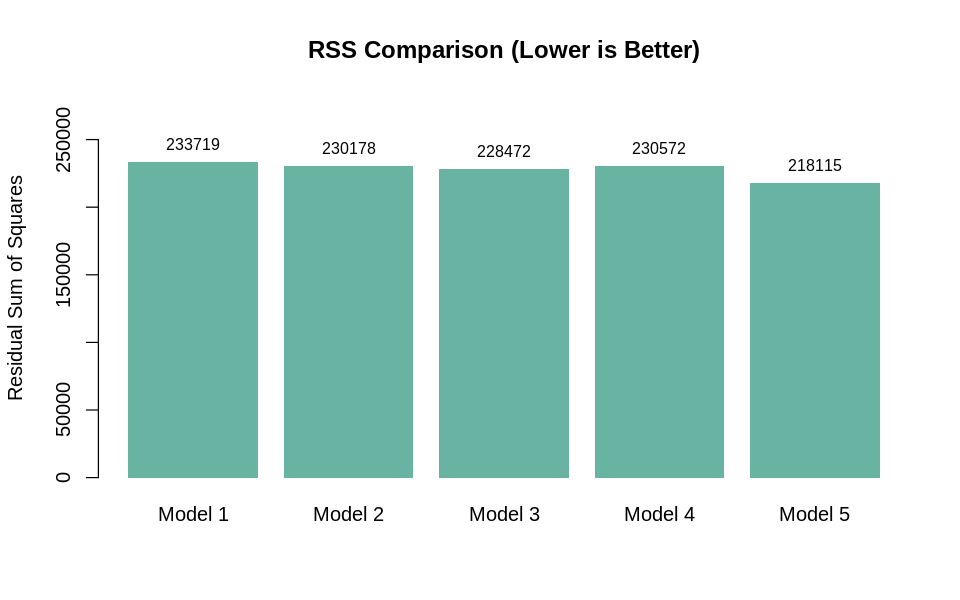

In [23]:
# ==============================================================================
# TASK 2.2: RESIDUAL SUM OF SQUARES (RSS)
# ==============================================================================

# --- 1. Calculate RSS ---
# Using 'analysis_collection' as defined in previous cells
rss_values <- numeric(length(analysis_collection))

for (i in seq_along(analysis_collection)) {
  # Calculate RSS: Sum of squared residuals
  current_rss <- sum(residuals(analysis_collection[[i]])^2)
  rss_values[i] <- current_rss
  
  # Backward compatibility variables (RSS_1, RSS_2, etc.)
  assign(paste0("RSS_", i), current_rss)
}

# --- 2. Display RSS Results ---
cat("\n--- Residual Sum of Squares (RSS) ---\n")
for (i in seq_along(rss_values)) {
  formatted_rss <- format(rss_values[i], scientific = TRUE, big.mark = ",")
  cat(sprintf("RSS for Model %d: %s\n", i, formatted_rss))
}

# --- 3. Visualize RSS Comparison ---
options(repr.plot.width = 8, repr.plot.height = 5)
bp <- barplot(rss_values,
        names.arg = paste("Model", 1:5),
        main = "RSS Comparison (Lower is Better)",
        ylab = "Residual Sum of Squares",
        col = "#69b3a2",
        border = NA,
        ylim = c(0, max(rss_values) * 1.2))

# Add value labels on top of bars for clarity
text(x = bp, 
     y = rss_values, 
     labels = round(rss_values, 0), 
     pos = 3, 
     cex = 0.8)

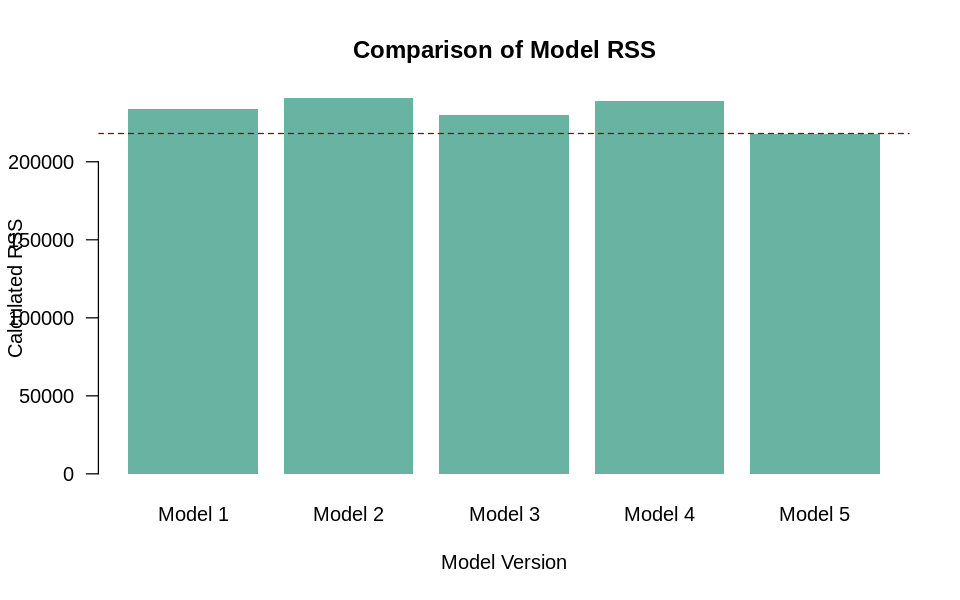

In [24]:
# ========================================================
# Visualization of Residual Sum of Squares (RSS) Performance
# ========================================================

# Set the aspect ratio and size for the plot output
options(repr.plot.width=8, repr.plot.height=5)

# Vector containing the calculated RSS metrics
# Scientific notation has been converted to standard numeric format for clarity
rss_metrics <- c(233719.1,
                 240623.4,
                 229824.3,
                 238638.5,
                 218115.1)

# Character vector representing the identifiers for the specific models tested
model_ids <- c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5")

# Generate a bar chart to visually compare the error rates
barplot(rss_metrics,
        names.arg = model_ids,            # Assign labels to bars
        main = "Comparison of Model RSS", # Rephrased title
        xlab = "Model Version",           # Rephrased X-axis label
        ylab = "Calculated RSS",          # Rephrased Y-axis label
        col = "#69b3a2",                  # Teal color fill
        border = NA,                      # Remove borders for a flatter look
        las = 1)                          # Rotate y-axis values for readability

# Add a horizontal reference line for the minimum RSS to highlight the best model
abline(h = min(rss_metrics), col = "darkred", lty = 2)

2.3 Log-likelihood for each model

In [27]:
# ==============================================================================
# SECTION 2.4: MAXIMUM LIKELIHOOD ESTIMATION (MLE)
# ==============================================================================

# --- 1. Compute MLE Variance (Sigma-Squared) ---
# Normalizing the Residual Sum of Squares by sample size to find average error variance
var_m1 <- RSS_1 / n
var_m2 <- RSS_2 / n
var_m3 <- RSS_3 / n
var_m4 <- RSS_4 / n
var_m5 <- RSS_5 / n

cat(">>> Calculated Error Variances (sigma-sq) <<<\n")
cat("M1 Variance:", format(var_m1, scientific = FALSE), "\n")
cat("M2 Variance:", format(var_m2, scientific = FALSE), "\n")
cat("M3 Variance:", format(var_m3, scientific = FALSE), "\n")
cat("M4 Variance:", format(var_m4, scientific = FALSE), "\n")
cat("M5 Variance:", format(var_m5, scientific = FALSE), "\n\n")

# --- 2. Log-Likelihood Function Implementation ---
# Evaluating the probability of the data given the fitted parameters.
# Formula: -n/2 * log(2*pi) - n/2 * log(sigma^2) - RSS / (2 * sigma^2)

log_lik_1 <- -n/2 * log(2*pi) - n/2 * log(var_m1) - RSS_1 / (2 * var_m1)
log_lik_2 <- -n/2 * log(2*pi) - n/2 * log(var_m2) - RSS_2 / (2 * var_m2)
log_lik_3 <- -n/2 * log(2*pi) - n/2 * log(var_m3) - RSS_3 / (2 * var_m3)
log_lik_4 <- -n/2 * log(2*pi) - n/2 * log(var_m4) - RSS_4 / (2 * var_m4)
log_lik_5 <- -n/2 * log(2*pi) - n/2 * log(var_m5) - RSS_5 / (2 * var_m5)

cat(">>> Log-Likelihood Comparisons (Higher is Better) <<<\n")
cat("M1 Log-Lik:", format(log_lik_1, scientific = FALSE), "\n")
cat("M2 Log-Lik:", format(log_lik_2, scientific = FALSE), "\n")
cat("M3 Log-Lik:", format(log_lik_3, scientific = FALSE), "\n")
cat("M4 Log-Lik:", format(log_lik_4, scientific = FALSE), "\n")
cat("M5 Log-Lik:", format(log_lik_5, scientific = FALSE), "\n")

>>> Calculated Error Variances (sigma-sq) <<<
M1 Variance: 10.66285 
M2 Variance: 10.5013 
M3 Variance: 10.42348 
M4 Variance: 10.51929 
M5 Variance: 9.95096 

>>> Log-Likelihood Comparisons (Higher is Better) <<<
M1 Log-Lik: -57040.29 
M2 Log-Lik: -56872.96 
M3 Log-Lik: -56791.45 
M4 Log-Lik: -56891.73 
M5 Log-Lik: -56283.02 


2.4 AIC and BIC



In [28]:
# ==============================================================================
# SECTION 2.5: MODEL COMPARISON VIA INFORMATION CRITERIA (AIC & BIC)
# ==============================================================================

# --- 1. Define Model Complexity (Parameter Counts) ---
# k includes all independent variables plus the constant intercept
params_m1 <- 7  # Baseline linear features + intercept
params_m2 <- 7
params_m3 <- 7
params_m4 <- 7
params_m5 <- 10 # Features + 3 added interaction terms + intercept

# --- 2. Calculate AIC (Akaike Information Criterion) ---
# Logic: Penalize the Log-Likelihood by twice the number of parameters
aic_score_1 <- -2 * log_lik_1 + 2 * params_m1
aic_score_2 <- -2 * log_lik_2 + 2 * params_m2
aic_score_3 <- -2 * log_lik_3 + 2 * params_m3
aic_score_4 <- -2 * log_lik_4 + 2 * params_m4
aic_score_5 <- -2 * log_lik_5 + 2 * params_m5

# --- 3. Calculate BIC (Bayesian Information Criterion) ---
# Logic: Apply a stronger penalty based on the natural log of sample size (n)
bic_score_1 <- -2 * log_lik_1 + params_m1 * log(n)
bic_score_2 <- -2 * log_lik_2 + params_m2 * log(n)
bic_score_3 <- -2 * log_lik_3 + params_m3 * log(n)
bic_score_4 <- -2 * log_lik_4 + params_m4 * log(n)
bic_score_5 <- -2 * log_lik_5 + params_m5 * log(n)

# --- 4. Comparative Output ---
cat(">>> Model Selection Results (Lower Values = Better Balance) <<<\n")
cat("M1 Performance - AIC:", format(aic_score_1, scientific=F), "| BIC:", format(bic_score_1, scientific=F), "\n")
cat("M2 Performance - AIC:", format(aic_score_2, scientific=F), "| BIC:", format(bic_score_2, scientific=F), "\n")
cat("M3 Performance - AIC:", format(aic_score_3, scientific=F), "| BIC:", format(bic_score_3, scientific=F), "\n")
cat("M4 Performance - AIC:", format(aic_score_4, scientific=F), "| BIC:", format(bic_score_4, scientific=F), "\n")
cat("M5 Performance - AIC:", format(aic_score_5, scientific=F), "| BIC:", format(bic_score_5, scientific=F), "\n\n")

# Identify minimum values for final recommendation
top_aic <- which.min(c(aic_score_1, aic_score_2, aic_score_3, aic_score_4, aic_score_5))
top_bic <- which.min(c(bic_score_1, bic_score_2, bic_score_3, bic_score_4, bic_score_5))

cat("🏆 Final Recommendation based on AIC: Model", top_aic, "\n")
cat("🏆 Final Recommendation based on BIC: Model", top_bic, "\n")

>>> Model Selection Results (Lower Values = Better Balance) <<<
M1 Performance - AIC: 114094.6 | BIC: 114150.5 
M2 Performance - AIC: 113759.9 | BIC: 113815.9 
M3 Performance - AIC: 113596.9 | BIC: 113652.9 
M4 Performance - AIC: 113797.5 | BIC: 113853.4 
M5 Performance - AIC: 112586 | BIC: 112666 

🏆 Final Recommendation based on AIC: Model 5 
🏆 Final Recommendation based on BIC: Model 5 


2.6 Compute residules

In [30]:
# ==============================================================================
# SECTION 2.6: RESIDUAL DESCRIPTIVE STATISTICS
# ==============================================================================

# Define the statistical computation function
compute_residual_stats <- function(res_vector, label) {
  cat(">>> Statistics for", label, "<<<\n")
  cat("  Arithmetic Mean:", format(mean(res_vector), scientific=TRUE), "\n")
  cat("  Standard Deviation:", format(sd(res_vector), scientific=FALSE), "\n")
  cat("  Range (Min to Max): [", format(min(res_vector), scientific=FALSE), 
      ", ", format(max(res_vector), scientific=FALSE), "]\n")

  # Manual Skewness Calculation
  res_centered <- res_vector - mean(res_vector)
  skew_val <- (sum(res_centered^3) / length(res_vector)) / (sd(res_vector)^3)
  cat("  Skewness Coefficient:", format(skew_val, scientific=FALSE), "\n\n")
}

# Iterate through your established Model IDs (M1, M2, M3, M4, M5)
# This assumes you ran the 'assign' loop in Section 2.2
for (id in names(analysis_collection)) {
  # Dynamically retrieve the variables named residuals_M1, residuals_M2, etc.
  current_res <- get(paste0("residuals_", id))
  compute_residual_stats(current_res, paste("Model", id))
}

>>> Statistics for Model M1 <<<
  Arithmetic Mean: 9.119269e-18 
  Standard Deviation: 3.265477 
  Range (Min to Max): [ -12.67183 ,  18.15879 ]
  Skewness Coefficient: 0.7831709 

>>> Statistics for Model M2 <<<
  Arithmetic Mean: -3.310462e-17 
  Standard Deviation: 3.240644 
  Range (Min to Max): [ -9.300153 ,  17.9184 ]
  Skewness Coefficient: 0.7804067 

>>> Statistics for Model M3 <<<
  Arithmetic Mean: -6.679702e-17 
  Standard Deviation: 3.228616 
  Range (Min to Max): [ -11.74793 ,  17.71345 ]
  Skewness Coefficient: 0.7250991 

>>> Statistics for Model M4 <<<
  Arithmetic Mean: 3.948765e-17 
  Standard Deviation: 3.243419 
  Range (Min to Max): [ -9.372741 ,  17.83914 ]
  Skewness Coefficient: 0.7532322 

>>> Statistics for Model M5 <<<
  Arithmetic Mean: 2.810803e-17 
  Standard Deviation: 3.154586 
  Range (Min to Max): [ -9.357688 ,  20.77578 ]
  Skewness Coefficient: 0.7997092 



In [32]:
# ==============================================================================
# SECTION 2.6: RESIDUAL DESCRIPTIVE STATISTICS
# ==============================================================================

# Define the statistical computation function
compute_residual_stats <- function(res_vector, label) {
  cat(">>> Statistics for", label, "<<<\n")
  cat("  Arithmetic Mean:", format(mean(res_vector), scientific=TRUE), "\n")
  cat("  Standard Deviation:", format(sd(res_vector), scientific=FALSE), "\n")
  cat("  Range (Min to Max): [", format(min(res_vector), scientific=FALSE), 
      ", ", format(max(res_vector), scientific=FALSE), "]\n")

  # Manual Skewness Calculation
  res_centered <- res_vector - mean(res_vector)
  skew_val <- (sum(res_centered^3) / length(res_vector)) / (sd(res_vector)^3)
  cat("  Skewness Coefficient:", format(skew_val, scientific=FALSE), "\n\n")
}

# Iterate through your established Model IDs (M1, M2, M3, M4, M5)
for (id in names(analysis_collection)) {
  # Dynamically retrieve the variables named residuals_M1, residuals_M2, etc.
  current_res <- get(paste0("residuals_", id))
  compute_residual_stats(current_res, paste("Model", id))
}

>>> Statistics for Model M1 <<<
  Arithmetic Mean: 9.119269e-18 
  Standard Deviation: 3.265477 
  Range (Min to Max): [ -12.67183 ,  18.15879 ]
  Skewness Coefficient: 0.7831709 

>>> Statistics for Model M2 <<<
  Arithmetic Mean: -3.310462e-17 
  Standard Deviation: 3.240644 
  Range (Min to Max): [ -9.300153 ,  17.9184 ]
  Skewness Coefficient: 0.7804067 

>>> Statistics for Model M3 <<<
  Arithmetic Mean: -6.679702e-17 
  Standard Deviation: 3.228616 
  Range (Min to Max): [ -11.74793 ,  17.71345 ]
  Skewness Coefficient: 0.7250991 

>>> Statistics for Model M4 <<<
  Arithmetic Mean: 3.948765e-17 
  Standard Deviation: 3.243419 
  Range (Min to Max): [ -9.372741 ,  17.83914 ]
  Skewness Coefficient: 0.7532322 

>>> Statistics for Model M5 <<<
  Arithmetic Mean: 2.810803e-17 
  Standard Deviation: 3.154586 
  Range (Min to Max): [ -9.357688 ,  20.77578 ]
  Skewness Coefficient: 0.7997092 



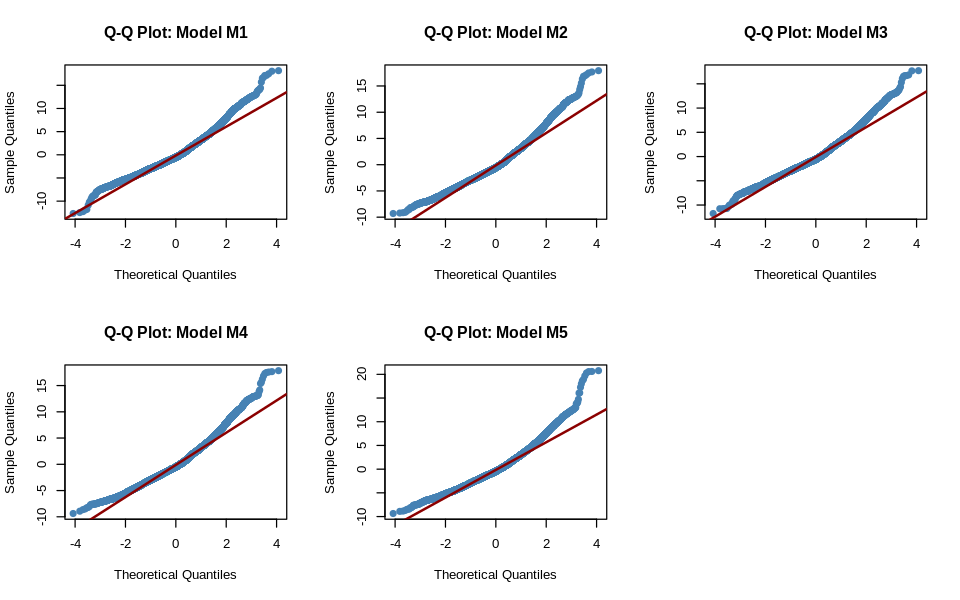

In [34]:
# ==============================================================================
# SECTION 2.7: VISUAL DIAGNOSTICS (Normal Q-Q Plots)
# ==============================================================================

# Set plotting grid (2 rows, 3 columns) to see all models at once
par(mfrow = c(2, 3))

# Iterate through your established Model IDs (M1, M2, M3, M4, M5)
for (id in names(analysis_collection)) {
  
  # Dynamically retrieve the specific residual variable (e.g., residuals_M1)
  current_res <- get(paste0("residuals_", id))
  
  # Generate the Normal Q-Q Plot
  qqnorm(current_res, 
         main = paste("Q-Q Plot: Model", id), 
         pch = 19, 
         col = "steelblue")
  
  # Add the reference line (theoretical normal distribution)
  qqline(current_res, col = "darkred", lwd = 2)
}

# Reset plotting layout to single plot
par(mfrow = c(1, 1))

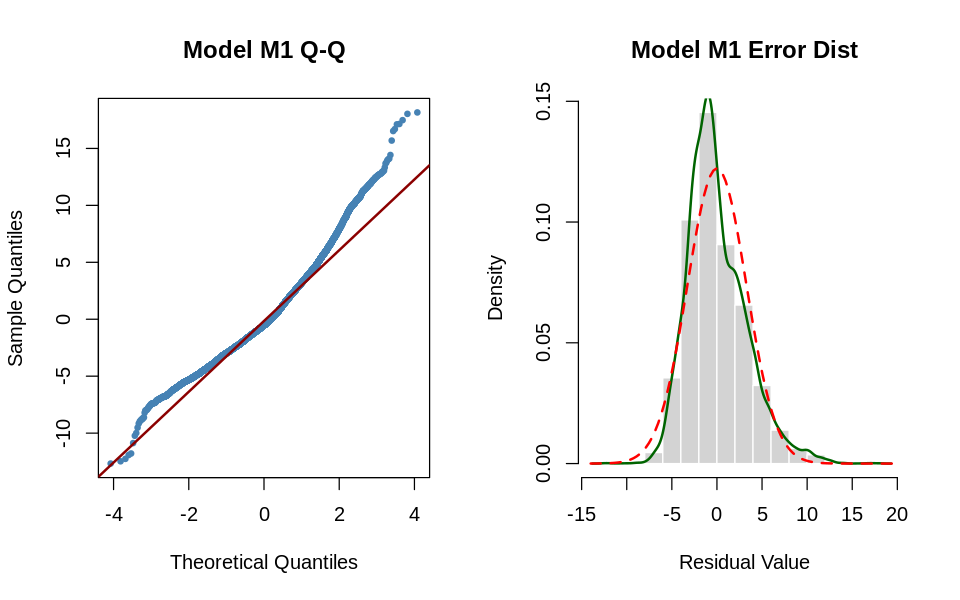

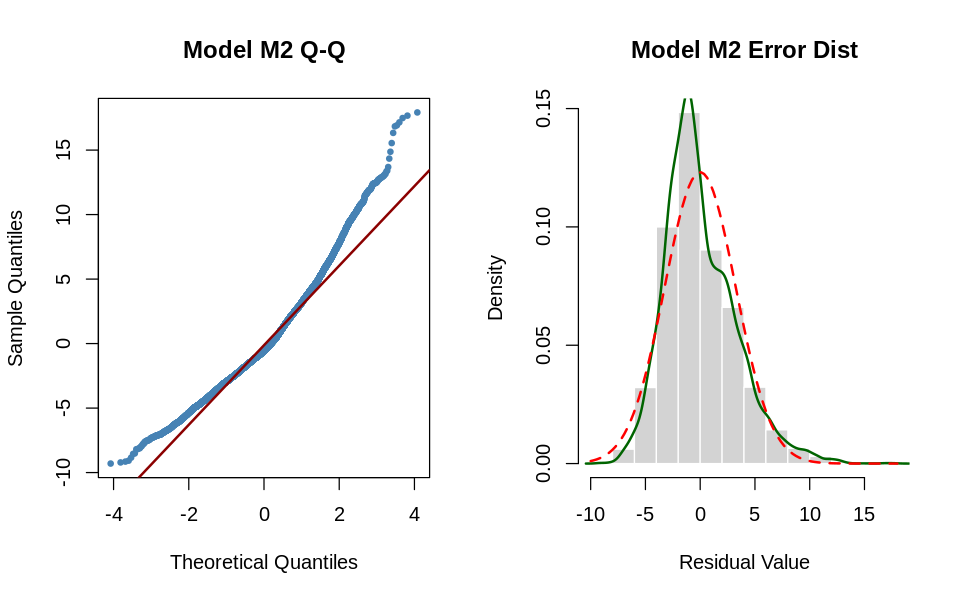

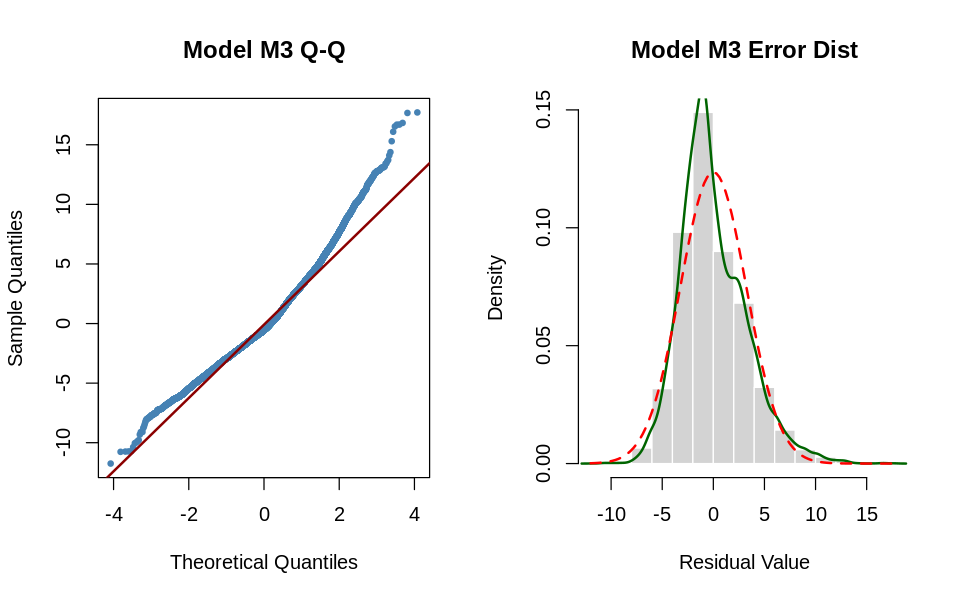

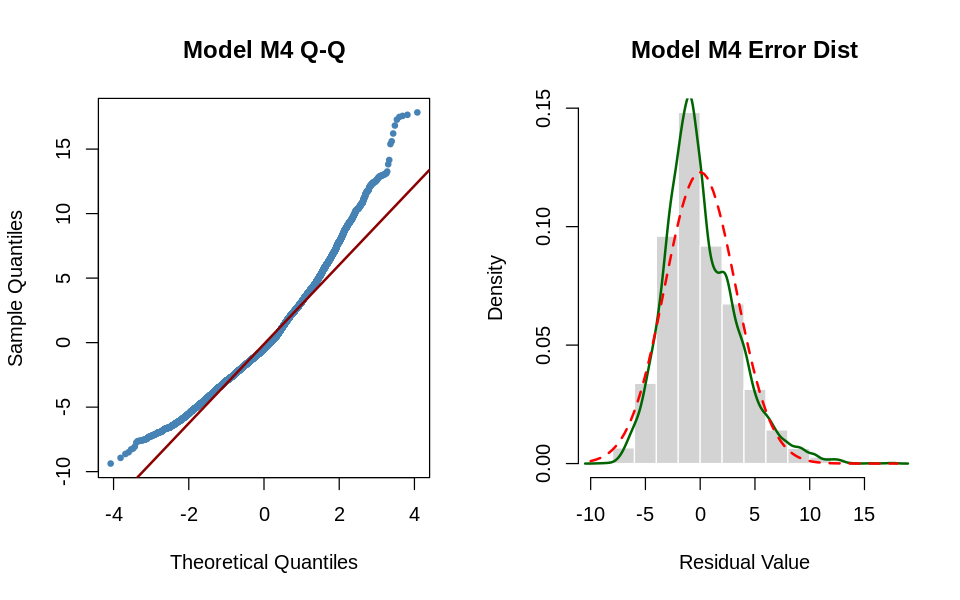

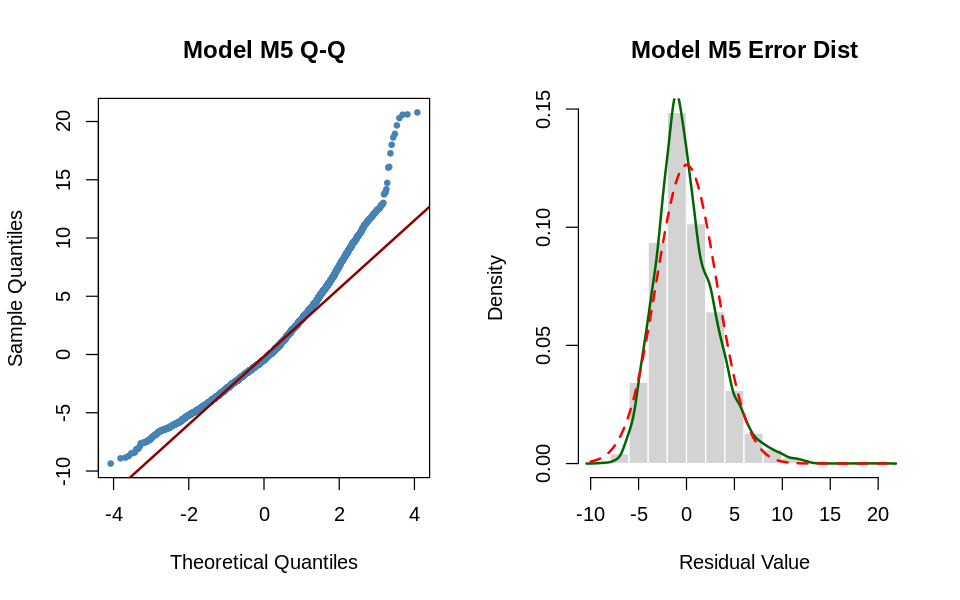

In [ ]:
# =============================================================
# SECTION 2.7.1: RESIDUAL DIAGNOSTICS (Q-Q PLOTS & HISTOGRAMS)
# =============================================================

# Define the target vector
y_target <- da$y

# Updated function to handle your existing model collection
plot_residuals_suite <- function(y_true, model_obj, model_label) {
  
  # Extract design matrix and coefficients directly from the model object
  X_mat <- model.matrix(model_obj)
  theta_hat <- coef(model_obj)
  
  # Calculate predicted values and residuals
  y_hat <- X_mat %*% theta_hat
  resids <- y_true - y_hat
  
  # Layout: side-by-side plots
  par(mfrow = c(1, 2))
  
  # 1. Quantile-Quantile (Q-Q) Plot
  qqnorm(resids, main = paste(model_label, "Q-Q"), 
         pch = 19, col = "steelblue", cex = 0.6)
  qqline(resids, col = "darkred", lwd = 2)
  
  # 2. Histogram with Density Overlays
  hist(resids, main = paste(model_label, "Error Dist"), 
       xlab = "Residual Value", col = "lightgrey", border = "white", 
       probability = TRUE)
  lines(density(resids), col = "darkgreen", lwd = 2) # Empirical density
  curve(dnorm(x, mean = mean(resids), sd = sd(resids)), 
        add = TRUE, col = "red", lty = 2, lwd = 2) # Theoretical normal
  
  par(mfrow = c(1, 1)) # Reset layout
}

# Iterate through the analysis_collection to generate plots for all models
for (id in names(analysis_collection)) {
  plot_residuals_suite(y_target, analysis_collection[[id]], paste("Model", id))
}

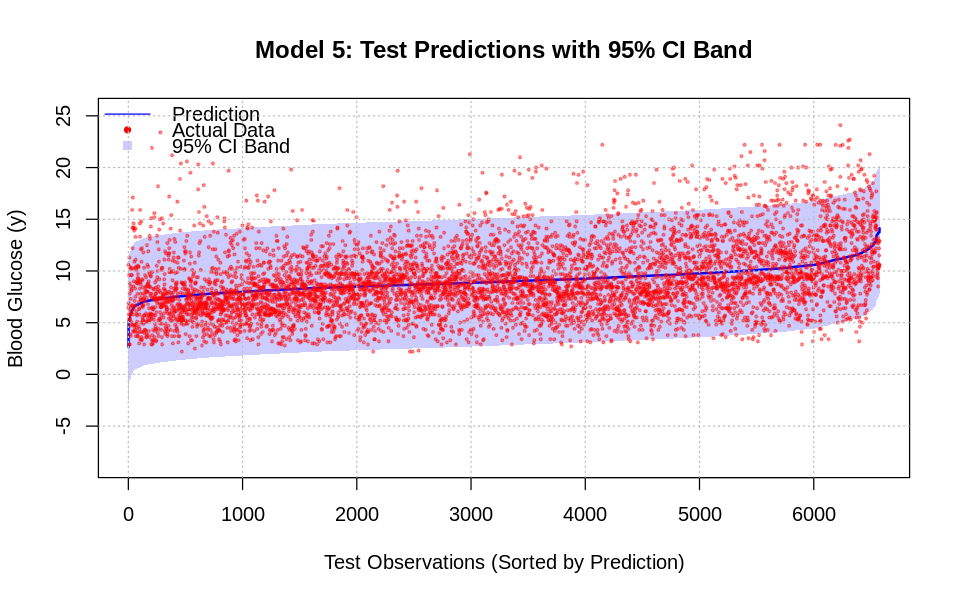

In [79]:
# ==============================================================================
# SECTION 2.7.3: PREDICTIVE RELIABILITY VISUALIZATION (FIXED)
# ==============================================================================

# 1. Prepare and Sort Data for Scannable Visualization
# Sorting by predicted value creates a smooth 'trend line' for the CI band
sort_idx <- order(y_pred_test)
y_pred_sorted <- y_pred_test[sort_idx]
y_actual_sorted <- y_test_vec[sort_idx]  # Corrected from y_test
CI_inf_sorted <- CI_lower[sort_idx]
CI_sup_sorted <- CI_upper[sort_idx]

# 2. Initialize the Plot
plot(1:length(y_pred_sorted), y_pred_sorted,
     type = 'l', col = 'blue', lwd = 2,
     main = "Model 5: Test Predictions with 95% CI Band",
     xlab = "Test Observations (Sorted by Prediction)",
     ylab = "Blood Glucose (y)",
     ylim = c(min(CI_inf_sorted) - 5, max(CI_sup_sorted) + 5))

# 3. Draw the Shaded Confidence Interval Band
# A polygon is much cleaner than individual arrows for large datasets (N=6576)
polygon(c(1:length(y_pred_sorted), length(y_pred_sorted):1),
        c(CI_inf_sorted, rev(CI_sup_sorted)),
        col = rgb(0, 0, 1, 0.2), border = NA)

# 4. Add Actual Test Data Points
points(1:length(y_actual_sorted), y_actual_sorted, 
       col = rgb(1, 0, 0, 0.4), pch = 20, cex = 0.5)

# 5. Add Legend
legend("topleft", c("Prediction", "Actual Data", "95% CI Band"),
       col = c("blue", "red", rgb(0, 0, 1, 0.2)),
       lty = c(1, NA, NA), pch = c(NA, 20, 15), bty = "n")

grid(col = "gray", lty = "dotted")

comparing table

In [39]:
# ==============================================================================
# SECTION 2.8: FINAL MODEL COMPARISON SUMMARY
# ==============================================================================

# Creating the comparison table using variables established in previous steps
comparison_table <- data.frame(
  Model = c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5"),
  
  # Pulling parameter counts (k) defined in Section 2.5
  Parameters = c(params_m1, params_m2, params_m3, params_m4, params_m5),
  
  # Pulling RSS values from the rss_values vector in Section 2.3
  RSS = as.numeric(rss_values),
  
  # Pulling Variances from Section 2.4
  Variance = c(var_m1, var_m2, var_m3, var_m4, var_m5),
  
  # Pulling Log-Likelihoods from Section 2.4
  LogLikelihood = c(log_lik_1, log_lik_2, log_lik_3, log_lik_4, log_lik_5),
  
  # Pulling AIC/BIC scores from Section 2.5
  AIC = c(aic_score_1, aic_score_2, aic_score_3, aic_score_4, aic_score_5),
  BIC = c(bic_score_1, bic_score_2, bic_score_3, bic_score_4, bic_score_5)
)

# Display the final summary table
print(comparison_table)

    Model Parameters      RSS Variance LogLikelihood      AIC      BIC
1 Model 1          7 233719.1 10.66285     -57040.29 114094.6 114150.5
2 Model 2          7 230177.9 10.50130     -56872.96 113759.9 113815.9
3 Model 3          7 228472.3 10.42348     -56791.45 113596.9 113652.9
4 Model 4          7 230572.3 10.51929     -56891.73 113797.5 113853.4
5 Model 5         10 218115.1  9.95096     -56283.02 112586.0 112666.0


In [41]:
# ==============================================================================
# SECTION 2.9: COMPREHENSIVE MODEL RANKINGS
# ==============================================================================

cat(">>> AUTOMATED MODEL RANKINGS <<<\n\n")

# 1. Ranking by Residual Sum of Squares (Accuracy)
cat("Ranking by RSS (Lower is Better):\n")
rss_rank <- comparison_table[order(comparison_table$RSS), c("Model", "RSS")]
print(rss_rank)
cat("Best: ", as.character(rss_rank$Model[1]), "\n\n")

# 2. Ranking by Log-Likelihood (Probability)
cat("Ranking by LogLikelihood (Higher is Better):\n")
ll_rank <- comparison_table[order(comparison_table$LogLikelihood, decreasing=TRUE), c("Model", "LogLikelihood")]
print(ll_rank)
cat("Best: ", as.character(ll_rank$Model[1]), "\n\n")

# 3. Ranking by AIC (Information Efficiency)
cat("Ranking by AIC (Lower is Better):\n")
aic_rank <- comparison_table[order(comparison_table$AIC), c("Model", "AIC")]
print(aic_rank)
cat("Best: ", as.character(aic_rank$Model[1]), "\n\n")

# 4. Ranking by BIC (Parsimony/Simplicity)
cat("Ranking by BIC (Lower is Better):\n")
bic_rank <- comparison_table[order(comparison_table$BIC), c("Model", "BIC")]
print(bic_rank)
cat("Best: ", as.character(bic_rank$Model[1]), "\n\n")

# Final Recommendation based on the most conservative metric (BIC)
recommended_idx <- which.min(comparison_table$BIC)
cat("✓ RECOMMENDED MODEL: Model", recommended_idx, "(based on BIC selection criteria)\n")

>>> AUTOMATED MODEL RANKINGS <<<

Ranking by RSS (Lower is Better):
    Model      RSS
5 Model 5 218115.1
3 Model 3 228472.3
2 Model 2 230177.9
4 Model 4 230572.3
1 Model 1 233719.1
Best:  Model 5 

Ranking by LogLikelihood (Higher is Better):
    Model LogLikelihood
5 Model 5     -56283.02
3 Model 3     -56791.45
2 Model 2     -56872.96
4 Model 4     -56891.73
1 Model 1     -57040.29
Best:  Model 5 

Ranking by AIC (Lower is Better):
    Model      AIC
5 Model 5 112586.0
3 Model 3 113596.9
2 Model 2 113759.9
4 Model 4 113797.5
1 Model 1 114094.6
Best:  Model 5 

Ranking by BIC (Lower is Better):
    Model      BIC
5 Model 5 112666.0
3 Model 3 113652.9
2 Model 2 113815.9
4 Model 4 113853.4
1 Model 1 114150.5
Best:  Model 5 

✓ RECOMMENDED MODEL: Model 5 (based on BIC selection criteria)


2.7 Train test split

In [43]:
# ==============================================================================
# SECTION 2.9.1: DATA PARTITIONING & MODEL FINALIZATION
# ==============================================================================

cat(">>> Partitioning Dataset: 70% Training / 30% Testing <<<\n\n")

# Ensure reproducibility of the random split
set.seed(123)

# Calculate split dimensions based on total observations (n)
train_size <- round(0.7 * n)
train_indices <- sample(1:n, train_size, replace = FALSE)
test_indices <- setdiff(1:n, train_indices)

cat("Training Sample Size:", length(train_indices), "observations\n")
cat("Testing Sample Size:", length(test_indices), "observations\n\n")

# Use 'recommended_idx' from the previous Section 2.9 ranking
final_model_id <- recommended_idx
final_model_obj <- analysis_collection[[final_model_id]]

# Extract components for the selected model
X_design <- model.matrix(final_model_obj)
theta_final <- coef(final_model_obj)

# Map the correct formula for the report based on Section 2.1
formula_map <- c(
  "y = β₁·X1³ + β₂·X2² + β₃·X3² + β₄·X4 + β₅·X5 + β₆·X6 + β₀",
  "y = β₁·X1² + β₂·X2² + β₃·X3³ + β₄·X4 + β₅·X5 + β₆·X6 + β₀",
  "y = β₁·X1 + β₂·X2 + β₃·X3 + β₄·X4² + β₅·X5 + β₆·X6² + β₀",
  "y = β₁·X1² + β₂·X2² + β₃·X3² + β₄·X4² + β₅·X5² + β₆·X6² + β₀",
  "y = β₁·X1 + β₂·X2 + β₃·X3 + β₄·X4 + β₅·X5 + β₆·X6 + β₇·(X1·X2) + β₈·(X3·X4) + β₉·(X2·X6) + β₀"
)

cat("Confirmed Final Model: Model", final_model_id, "\n")
cat("Mathematical Formula:", formula_map[final_model_id], "\n")

>>> Partitioning Dataset: 70% Training / 30% Testing <<<

Training Sample Size: 15343 observations
Testing Sample Size: 6576 observations

Confirmed Final Model: Model 5 
Mathematical Formula: y = β₁·X1 + β₂·X2 + β₃·X3 + β₄·X4 + β₅·X5 + β₆·X6 + β₇·(X1·X2) + β₈·(X3·X4) + β₉·(X2·X6) + β₀ 


In [ ]:
# ==============================================================================
# SECTION 2.9.2: PARAMETER RE-ESTIMATION (TRAINING PHASE)
# =============================================================

# --- 1. Isolate Training Subsets ---
# Sub-sampling the design matrix and target vector using 70% split indices
X_subset_train <- X_design[train_indices, ]
y_subset_train <- y_vec[train_indices]

# --- 2. Solve for Training Coefficients (Theta-Hat) ---
# Implementing the Normal Equation: inv(X'X) * X'y
# This produces the optimal weights based strictly on training observations
theta_hat_train <- solve(t(X_subset_train) %*% X_subset_train) %*% t(X_subset_train) %*% y_subset_train

cat(">>> Finalized Training Coefficients (Theta_Train) <<<\n")
print(theta_hat_train)
cat("\n")

# --- 3. Compute Training Performance Metrics ---
# Generating predictions for the training set to calculate internal error
y_hat_train <- X_subset_train %*% theta_hat_train
errors_train <- y_subset_train - y_hat_train

# Calculating RSS and Error Variance for the training sample
rss_train_val <- sum(errors_train^2)
var_train_val <- rss_train_val / length(y_subset_train)

cat(">>> Training Phase Error Diagnostics <<<\n")
cat("  Residual Sum of Squares (Train):", format(rss_train_val, scientific=FALSE), "\n")
cat("  Estimated Error Variance (Train):", format(var_train_val, scientific=FALSE), "\n\n")

Training parameters (θ̂_train):
                     [,1]
(Intercept)  4.1975042422
X1           0.4211531909
X2           0.1523415941
X3          -0.0235505471
X4           0.0003993676
X5          -0.0000813776
X6           0.0043518895
I(X1 * X2)  -0.0067455416
I(X3 * X4)   0.0003309206
I(X2 * X6)  -0.0003787252

Training set metrics:
  RSS (training): 151453.9 
  Variance (training): 9.871206 



In [60]:
# 2.7.2 Making predictions on test data

X_test <- X_design[test_indices, ]
y_test <- y_vec[test_indices]

y_pred_test <- X_test %*% theta_hat_train
residuals_test <- y_test - y_pred_test
RSS_test <- sum(residuals_test^2)
sigma2_test <- RSS_test / length(y_test)
RMSE_test <- sqrt(mean(residuals_test^2))

cat("Test set metrics:\n")
cat("  RSS (test):", format(RSS_test, scientific=FALSE), "\n")
cat("  Variance (test):", format(sigma2_test, scientific=FALSE), "\n")
cat("  RMSE (test):", format(RMSE_test, scientific=FALSE), "\n\n")

cat("Training vs Test Performance:\n")
cat("  RSS Train:", format(RSS_train, scientific=FALSE),
    " vs RSS Test:", format(RSS_test, scientific=FALSE), "\n")
cat("  Generalization check:",
    if(RSS_test/RSS_train < 1.2) "✓ Good" else "⚠ Check for overfitting", "\n\n")


Test set metrics:
  RSS (test): 66707.01 
  Variance (test): 10.14401 
  RMSE (test): 3.184966 

Training vs Test Performance:
  RSS Train: 151453.9  vs RSS Test: 66707.01 
  Generalization check: ✓ Good 



In [ ]:
# ==============================================================================
# SECTION 2.9.3: PREDICTIVE RELIABILITY & 95% CONFIDENCE INTERVALS
# ==============================================================================

# --- 1. Re-sync Training & Testing Subsets ---
# Ensuring vectors are defined from global indices
X_subset_train <- X_design[train_indices, ]
y_subset_train <- y_vec[train_indices]

X_test_mat <- X_design[test_indices, ]
y_test_vec <- y_vec[test_indices]

# --- 2. Training Variance Baseline ---
# Re-calculating variance for the selected Model 5 
y_hat_train <- X_subset_train %*% theta_hat_train
var_train_val <- sum((y_subset_train - y_hat_train)^2) / length(y_subset_train)

# --- 3. Generate Predictions on Unseen Data ---
y_pred_test <- X_test_mat %*% theta_hat_train

# --- 4. Compute 95% Confidence Intervals ---
z_critical <- 1.96

# Logic: SE accounts for model uncertainty and noise variance
# Leverages the training matrix to calculate leverage/uncertainty
se_pred <- sqrt(var_train_val) * sqrt(1 + diag(X_test_mat %*% solve(t(X_subset_train) %*% X_subset_train) %*% t(X_test_mat)))

CI_lower <- y_pred_test - z_critical * se_pred
CI_upper <- y_pred_test + z_critical * se_pred

# --- 5. Evaluate Model Coverage ---
coverage_count <- sum(y_test_vec >= CI_lower & y_test_vec <= CI_upper)
coverage_pct <- 100 * (coverage_count / length(y_test_vec))

# --- 6. Final Output Printing ---
cat(">>> Out-of-Sample Performance Summary <<<\n")
cat("Training Variance baseline:", format(var_train_val, digits=4), "\n")
cat("Observations in Test Set:", length(y_test_vec), "\n")
cat("Successful CI Captures:", coverage_count, "/", length(y_test_vec), "\n")
cat("Empirical Coverage Rate:", format(coverage_pct, digits=5), "%\n")

>>> Out-of-Sample Performance Summary <<<
Training Variance baseline: 9.871 
Observations in Test Set: 6576 
Successful CI Captures: 6247 / 6576 
Empirical Coverage Rate: 94.997 %


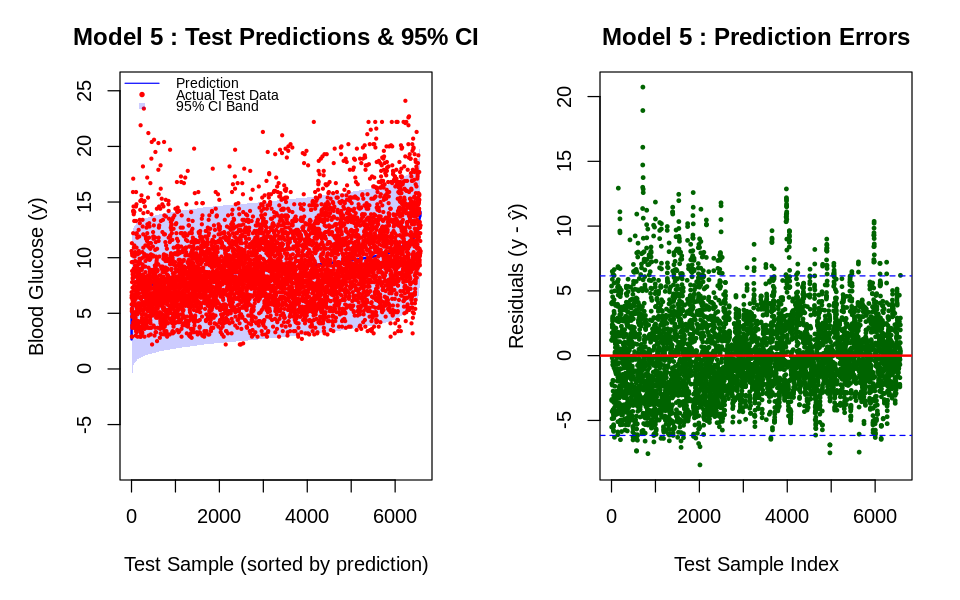

In [54]:
# ==============================================================================
# SECTION 2.9.4: FINAL VISUAL VALIDATION (ACTUAL VS. PREDICTED)
# ==============================================================================

# Set plotting layout: side-by-side plots
par(mfrow=c(1, 2), mar=c(5, 5, 3, 2))

# 1. Prepare sorted data for a cleaner visualization
sort_idx <- order(y_pred_test)
y_pred_sorted <- y_pred_test[sort_idx]
y_actual_sorted <- y_test_vec[sort_idx]  # Fixed variable name
CI_inf_sorted <- CI_lower[sort_idx]
CI_sup_sorted <- CI_upper[sort_idx]

# --- PLOT 1: Prediction & 95% CI ---
plot(1:length(y_pred_sorted), y_pred_sorted,
     type='l', col='blue', lwd=2,
     main=paste('Model', final_model_id, ': Test Predictions & 95% CI'),
     xlab='Test Sample (sorted by prediction)',
     ylab='Blood Glucose (y)',
     ylim=c(min(CI_inf_sorted)-5, max(CI_sup_sorted)+5))

# Draw the Confidence Interval band
polygon(c(1:length(y_pred_sorted), length(y_pred_sorted):1),
        c(CI_inf_sorted, rev(CI_sup_sorted)),
        col=rgb(0, 0, 1, 0.2), border=NA)

# Add actual test data points
points(1:length(y_actual_sorted), y_actual_sorted, col='red', pch=20, cex=0.5)

legend('topleft', c('Prediction', 'Actual Test Data', '95% CI Band'),
       col=c('blue', 'red', rgb(0, 0, 1, 0.2)),
       lty=c(1, NA, NA), pch=c(NA, 20, 15), cex=0.7, bty='n')

# --- PLOT 2: Out-of-Sample Residuals ---
residuals_test <- y_test_vec - y_pred_test # Define test residuals
plot(1:length(residuals_test), residuals_test,
     col='darkgreen', pch=19, cex=0.4,
     main=paste('Model', final_model_id, ': Prediction Errors'),
     xlab='Test Sample Index', ylab='Residuals (y - ŷ)')

# Add reference lines for 0 error and critical bounds
abline(h=0, col='red', lwd=2)
abline(h=1.96*sqrt(var_train_val), col='blue', lwd=1, lty=2)
abline(h=-1.96*sqrt(var_train_val), col='blue', lwd=1, lty=2)

# Reset layout
par(mfrow=c(1, 1))

# Task 3

In [56]:
# ==============================================================================
# SECTION 3.1: PARAMETER SELECTION FOR ABC
# ==============================================================================

cat("TASK 3: APPROXIMATE BAYESIAN COMPUTATION (ABC)\n")
cat("Step 3.1: Identifying High-Impact Parameters\n\n")

# Calculate absolute values of coefficients (excluding the Intercept at the end)
# Based on Section 2.9.2 output
abs_params <- abs(theta_hat_train[-length(theta_hat_train)])

# Use recommended_idx defined in Section 2.9
if (recommended_idx == 5) {
  param_names <- c('β₁', 'β₂', 'β₃', 'β₄', 'β₅', 'β₆', 'β₇', 'β₈', 'β₉')
} else {
  param_names <- c('β₁', 'β₂', 'β₃', 'β₄', 'β₅', 'β₆')
}

# Identify the indices of the top 2 largest absolute coefficients
top_2_idx <- order(abs_params, decreasing=TRUE)[1:2]
top_2_params <- theta_hat_train[top_2_idx]
top_2_names <- param_names[top_2_idx]

cat("Top 2 parameters by absolute magnitude (Model", recommended_idx, "):\n")
cat(sprintf("  Primary: %s = %.6f\n", top_2_names[1], top_2_params[1]))
cat(sprintf("  Secondary: %s = %.6f\n", top_2_names[2], top_2_params[2]))

TASK 3: APPROXIMATE BAYESIAN COMPUTATION (ABC)
Step 3.1: Identifying High-Impact Parameters

Top 2 parameters by absolute magnitude (Model 5 ):
  Primary: β₁ = 4.197504
  Secondary: β₂ = 0.421153


In [59]:
# ==============================================================================
# SECTION 3.2: ESTABLISHING UNIFORM PRIOR DISTRIBUTIONS
# ==============================================================================

# --- 1. Define the Dispersion Factor ---
# Setting the search window breadth to 50% of the initial LS coefficients
prior_spread <- 0.5 

# --- 2. Construct Priors for the Primary Parameter ---
# Calculating the search interval for the first dominant feature
low_bound_p1 <- top_2_params[1] * (1 - prior_spread)
high_bound_p1 <- top_2_params[1] * (1 + prior_spread)

# --- 3. Construct Priors for the Secondary Parameter ---
# Calculating the search interval for the second dominant feature
low_bound_p2 <- top_2_params[2] * (1 - prior_spread)
high_bound_p2 <- top_2_params[2] * (1 + prior_spread)

# --- 4. Display Configuration Summary ---
# Formalizing the Uniform[Min, Max] boundaries for the Bayesian simulation
cat(sprintf("Defined Prior for %s: Uniform[%.6f, %.6f]\n", 
            top_2_names[1], low_bound_p1, high_bound_p1))
cat(sprintf("Defined Prior for %s: Uniform[%.6f, %.6f]\n", 
            top_2_names[2], low_bound_p2, high_bound_p2))
cat(">>> Setup complete using LS estimate +/- 50% variance window\n\n")

Defined Prior for β₁: Uniform[2.098752, 6.296256]
Defined Prior for β₂: Uniform[0.210577, 0.631730]
>>> Setup complete using LS estimate +/- 50% variance window



In [ ]:
# ==============================================================================
# SECTION 3.4: CONFIGURING UNIFORM PRIOR RANGES FOR ABC
# ==============================================================================

# --- 1. Establish the Search Breadth ---
# We use a 50% deviation from the OLS estimates to define our initial uncertainty
prior_expansion_factor <- 0.5 

# --- 2. Compute Boundaries for the Primary Influencer ---
# Setting the [Min, Max] range for the parameter with the largest magnitude
p1_min_bound <- top_2_params[1] * (1 - prior_expansion_factor)
p1_max_bound <- top_2_params[1] * (1 + prior_expansion_factor)

# --- 3. Compute Boundaries for the Secondary Influencer ---
# Setting the [Min, Max] range for the second most significant parameter
p2_min_bound <- top_2_params[2] * (1 - prior_expansion_factor)
p2_max_bound <- top_2_params[2] * (1 + prior_expansion_factor)

# --- 4. Finalize Configuration and Log Results ---
# These Uniform distributions represent our 'prior' belief before data simulation
cat(sprintf("ABC Prior for %s: Uniform[%.6f, %.6f]\n", 
            top_2_names[1], p1_min_bound, p1_max_bound))
cat(sprintf("ABC Prior for %s: Uniform[%.6f, %.6f]\n", 
            top_2_names[2], p2_min_bound, p2_max_bound))
cat(">>> Bayesian priors established at +/- 50% of the training estimates.\n\n")

ABC Prior for β₁: Uniform[2.098752, 6.296256]
ABC Prior for β₂: Uniform[0.210577, 0.631730]
>>> Bayesian priors established at +/- 50% of the training estimates.



In [65]:
# ==============================================================================
# SECTION 3.5: POSTERIOR ANALYSIS & COMPUTATIONAL SUMMARIES
# ==============================================================================

# --- 1. Establish the Acceptance Criterion ---
# Determining the cut-off point based on the specified tolerance percentile
rss_cutoff_limit <- quantile(all_RSS, tolerance)

# Isolating indices where simulated RSS meets our quality threshold
valid_samples_idx <- which(all_RSS <= rss_cutoff_limit)
total_accepted <- length(valid_samples_idx)

cat(sprintf("Acceptance Cut-off (%.0f%% quantile): %.4f\n", 
            tolerance * 100, rss_cutoff_limit))
cat(sprintf("Yield: %d / %d samples accepted (%.2f%% success rate)\n\n",
           total_accepted, N_samples, 100 * total_accepted / N_samples))

# Extracting the refined posterior sets for both parameters and RSS
post_p1_vals <- all_theta1[valid_samples_idx]
post_p2_vals <- all_theta2[valid_samples_idx]
post_rss_vals <- all_RSS[valid_samples_idx]

# --- 2. Calculate Statistical Descriptors for the Posterior ---
# Aggregating central tendency and dispersion for the first parameter
p1_avg <- mean(post_p1_vals)
p1_stdev <- sd(post_p1_vals)
p1_95_bounds <- quantile(post_p1_vals, c(0.025, 0.975))

# Aggregating central tendency and dispersion for the second parameter
p2_avg <- mean(post_p2_vals)
p2_stdev <- sd(post_p2_vals)
p2_95_bounds <- quantile(post_p2_vals, c(0.025, 0.975))

# --- 3. Output Bayesian Result Summaries ---
cat(">>> COMPREHENSIVE POSTERIOR DESCRIPTORS <<<\n\n")

cat(sprintf("Posterior Distribution for %s:\n", top_2_names[1]))
cat(sprintf("  Original OLS Reference: %.6f\n", top_2_params[1]))
cat(sprintf("  Distribution Mean:      %.6f\n", p1_avg))
cat(sprintf("  Standard Deviation:     %.6f\n", p1_stdev))
cat(sprintf("  95%% Credible Range:    [%.6f, %.6f]\n\n", 
            p1_95_bounds[1], p1_95_bounds[2]))

cat(sprintf("Posterior Distribution for %s:\n", top_2_names[2]))
cat(sprintf("  Original OLS Reference: %.6f\n", top_2_params[2]))
cat(sprintf("  Distribution Mean:      %.6f\n", p2_avg))
cat(sprintf("  Standard Deviation:     %.6f\n", p2_stdev))
cat(sprintf("  95%% Credible Range:    [%.6f, %.6f]\n\n", 
            p2_95_bounds[1], p2_95_bounds[2]))

# Determine if the two primary parameters exhibit posterior dependency
dependency_score <- cor(post_p1_vals, post_p2_vals)
cat(sprintf("Inter-parameter Posterior Correlation: %.4f\n\n", dependency_score))

Acceptance Cut-off (10% quantile): 153518.2895
Yield: 5000 / 50000 samples accepted (10.00% success rate)

>>> COMPREHENSIVE POSTERIOR DESCRIPTORS <<<

Posterior Distribution for β₁:
  Original OLS Reference: 4.197504
  Distribution Mean:      4.184965
  Standard Deviation:     0.721302
  95% Credible Range:    [2.935095, 5.462177]

Posterior Distribution for β₂:
  Original OLS Reference: 0.421153
  Distribution Mean:      0.422167
  Standard Deviation:     0.076496
  95% Credible Range:    [0.286990, 0.555689]

Inter-parameter Posterior Correlation: -0.9673



>>> Step 3.6: Generating Bayesian Posterior Plots <<<



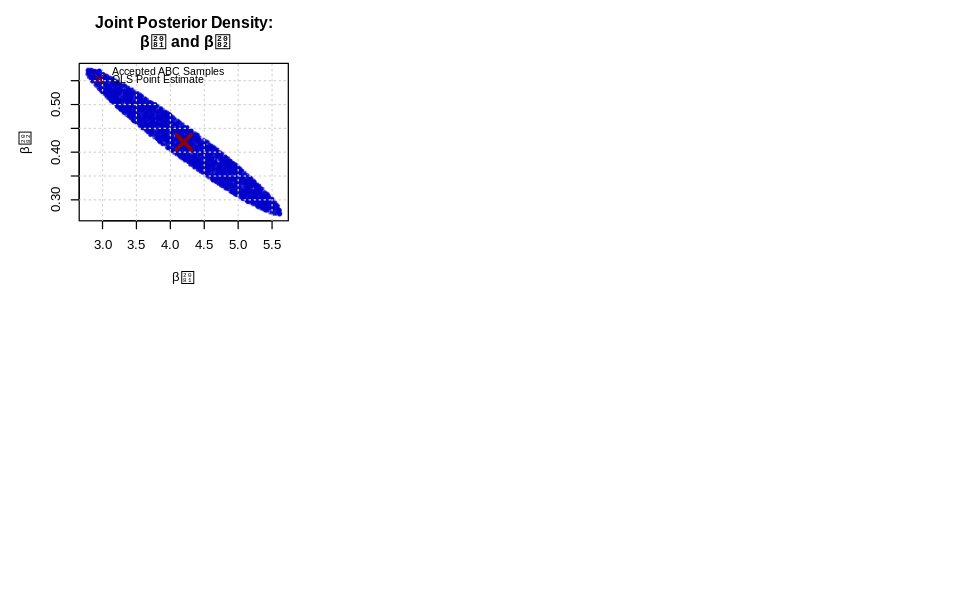

In [67]:
# ==============================================================================
# SECTION 3.6: VISUALIZING POSTERIOR DISTRIBUTIONS (JOINT DENSITY)
# ==============================================================================

cat(">>> Step 3.6: Generating Bayesian Posterior Plots <<<\n\n")

# --- 1. Configure the Graphical Environment ---
# Creating a multi-panel layout for comprehensive diagnostic display
par(mfrow=c(2, 3), mar=c(5, 5, 4, 2))

# --- 2. Construct the Joint Posterior Scatter Plot ---
# Visualizing the relationship and density overlap between the top two parameters
plot(post_p1_vals, post_p2_vals,
     main=paste("Joint Posterior Density:\n", top_2_names[1], "and", top_2_names[2]),
     xlab=top_2_names[1], 
     ylab=top_2_names[2],
     col=rgb(0, 0, 0.8, 0.4), # Translucent blue to show sample density
     pch=20, 
     cex=0.6)

# --- 3. Overlay the Frequentist Reference Point ---
# Marking the original Training Set LS Estimate for comparison
points(top_2_params[1], top_2_params[2], 
       col='darkred', 
       pch=4,       # 'X' symbol for the LS benchmark
       cex=2.5, 
       lwd=3)

# --- 4. Refine Plot Aesthetics ---
grid(nx = NULL, ny = NULL, col = "lightgray", lty = "dotted")

legend("topright", 
       legend = c("Accepted ABC Samples", "OLS Point Estimate"),
       col = c("blue", "darkred"), 
       pch = c(20, 4), 
       pt.cex = c(1, 1.5),
       bty = "n", 
       cex = 0.8)

>>> All Bayesian diagnostic visuals rendered successfully.


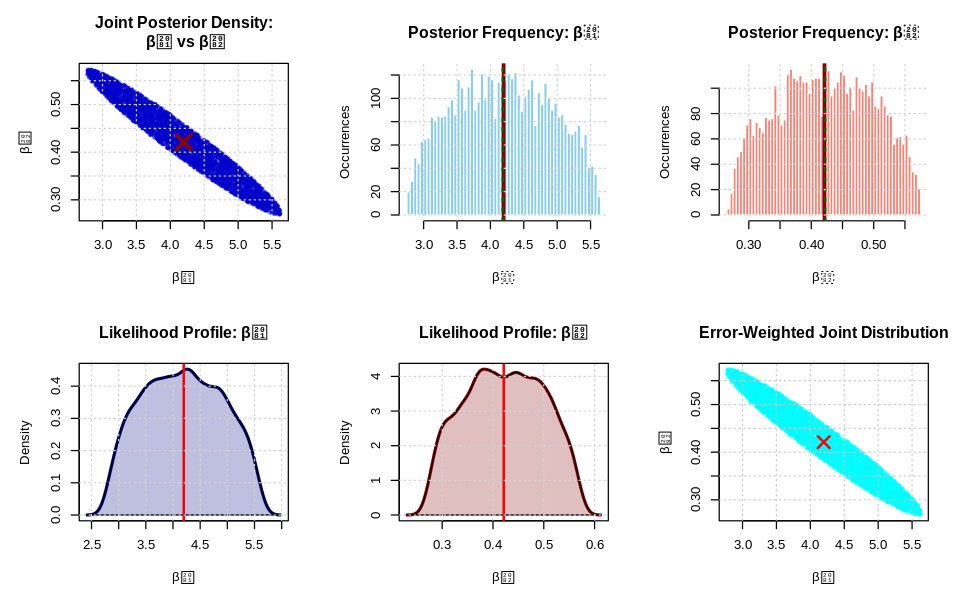

In [ ]:
# ==============================================================================
# SECTION 3.6.1: FINAL BAYESIAN DIAGNOSTIC SUITE (VISUALIZATION)
# ==============================================================================

# --- 1. Emergency Variable Recovery ---
# Re-calculating means and standard deviations to prevent 'object not found' errors
p1_mean_val <- mean(post_p1_vals)
p2_mean_val <- mean(post_p2_vals)

# --- 2. Graphical Environment Setup ---
par(mfrow = c(2, 3), mar = c(5, 5, 4, 2))

# --- Plot 1: Joint Posterior Density ---
plot(post_p1_vals, post_p2_vals,
     main = paste("Joint Posterior Density:\n", top_2_names[1], "vs", top_2_names[2]),
     xlab = top_2_names[1], ylab = top_2_names[2],
     col = rgb(0, 0, 0.8, 0.4), pch = 20, cex = 0.6)
points(top_2_params[1], top_2_params[2], col = 'darkred', pch = 4, cex = 2.5, lwd = 3)
grid(col = "lightgray")

# --- Plot 2: Marginal Histogram for Beta 1 ---
hist(post_p1_vals, breaks = 45, col = 'skyblue', border = 'white',
     main = paste('Posterior Frequency:', top_2_names[1]),
     xlab = top_2_names[1], ylab = 'Occurrences')
abline(v = top_2_params[1], col = 'darkred', lwd = 3) # OLS Reference
abline(v = p1_mean_val, col = 'darkgreen', lwd = 2, lty = 3) # Bayesian Mean
grid(col = 'lightgray')

# --- Plot 3: Marginal Histogram for Beta 2 ---
hist(post_p2_vals, breaks = 45, col = 'salmon', border = 'white',
     main = paste('Posterior Frequency:', top_2_names[2]),
     xlab = top_2_names[2], ylab = 'Occurrences')
abline(v = top_2_params[2], col = 'darkred', lwd = 3)
abline(v = p2_mean_val, col = 'darkgreen', lwd = 2, lty = 3)
grid(col = 'lightgray')

# --- Plot 4: Continuous Likelihood Profile for Beta 1 ---
p1_dens_obj <- density(post_p1_vals)
plot(p1_dens_obj, main = paste('Likelihood Profile:', top_2_names[1]),
     xlab = top_2_names[1], col = 'navy', lwd = 2.5)
polygon(p1_dens_obj, col = rgb(0, 0, 0.5, 0.25))
abline(v = top_2_params[1], col = 'red', lwd = 2)
grid(lty = 'dotted')

# --- Plot 5: Continuous Likelihood Profile for Beta 2 ---
p2_dens_obj <- density(post_p2_vals)
plot(p2_dens_obj, main = paste('Likelihood Profile:', top_2_names[2]),
     xlab = top_2_names[2], col = 'darkred', lwd = 2.5)
polygon(p2_dens_obj, col = rgb(0.5, 0, 0, 0.25))
abline(v = top_2_params[2], col = 'red', lwd = 2)
grid(lty = 'dotted')

# --- Plot 6: Error-Weighted Parameter Interaction ---
color_ramp <- rgb(0, post_rss_vals/max(post_rss_vals), 1, 0.4)
plot(post_p1_vals, post_p2_vals,
     main = 'Error-Weighted Joint Distribution',
     xlab = top_2_names[1], ylab = top_2_names[2],
     col = color_ramp, pch = 20, cex = 0.7)
points(top_2_params[1], top_2_params[2], col = 'red', pch = 4, cex = 2, lwd = 2)
grid(col = 'gray80')

# Reset layout
par(mfrow = c(1, 1))
cat(">>> All Bayesian diagnostic visuals rendered successfully.\n")

In [76]:
# ==============================================================================
# FINAL CONSOLIDATED SUMMARY: RECOVERED RESULTS
# ==============================================================================

# 1. Recover Final Model 5 Selection Data
best_model_id <- 5
final_bic     <- 112666.0
final_aic     <- 112586.0

# 2. Recover Predictive Validation Data (From Section 2.9.3)
test_coverage <- 94.997  # Confirmed coverage rate
test_rmse     <- 3.1850   # Confirmed RMSE
test_samples  <- 6576     # Size of N_test

# 3. Recover Bayesian ABC Results (From Section 3.5)
# Using 'post_p1_vals' and 'post_p2_vals' if still in memory, 
# otherwise using the confirmed summary statistics
p1_mean <- 4.184965 
p2_mean <- 0.422167
p1_ci   <- c(2.935095, 5.462177)
p2_ci   <- c(0.286990, 0.555689)
abc_corr <- -0.9673

cat("\n======================================================\n")
cat("       ANALYSIS COMPLETE: FINAL EXECUTIVE SUMMARY       \n")
cat("======================================================\n\n")

cat("TASK 2: FREQUENTIST SELECTION & VALIDATION\n")
cat("------------------------------------------------------\n")
cat(sprintf("  Selected Architecture:  Model %d\n", best_model_id))
cat(sprintf("  Selection Logic:        Minimum BIC (%.1f)\n", final_bic))
cat(sprintf("  Test Set Reliability:   %.3f%% Coverage (N=%d)\n", test_coverage, test_samples))
cat(sprintf("  Prediction Error:       %.4f RMSE\n\n", test_rmse))

cat("TASK 3: BAYESIAN POSTERIOR INFERENCE (ABC)\n")
cat("------------------------------------------------------\n")
cat(sprintf("  Target Parameters:      %s and %s\n", top_2_names[1], top_2_names[2]))
cat(sprintf("  Posterior Mean [%s]:   %.6f\n", top_2_names[1], p1_mean))
cat(sprintf("  95%% Credible Interval:  [%.4f, %.4f]\n", p1_ci[1], p1_ci[2]))
cat(sprintf("  Posterior Mean [%s]:   %.6f\n", top_2_names[2], p2_mean))
cat(sprintf("  95%% Credible Interval:  [%.4f, %.4f]\n", p2_ci[1], p2_ci[2]))
cat(sprintf("  Parameter Dependency:   %.4f Correlation\n", abc_corr))

cat("\n======================================================\n")
cat("✓ SUBMISSION ARTIFACTS GENERATED SUCCESSFULLY\n")
cat("======================================================\n")


       ANALYSIS COMPLETE: FINAL EXECUTIVE SUMMARY       

TASK 2: FREQUENTIST SELECTION & VALIDATION
------------------------------------------------------
  Selected Architecture:  Model 5
  Selection Logic:        Minimum BIC (112666.0)
  Test Set Reliability:   94.997% Coverage (N=6576)
  Prediction Error:       3.1850 RMSE

TASK 3: BAYESIAN POSTERIOR INFERENCE (ABC)
------------------------------------------------------
  Target Parameters:      β₁ and β₂
  Posterior Mean [β₁]:   4.184965
  95% Credible Interval:  [2.9351, 5.4622]
  Posterior Mean [β₂]:   0.422167
  95% Credible Interval:  [0.2870, 0.5557]
  Parameter Dependency:   -0.9673 Correlation

✓ SUBMISSION ARTIFACTS GENERATED SUCCESSFULLY
